# TS Forecasting - Crude Oil

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Crude oil.csv")

In [3]:
df

Date2       Date3       Date1        Date  Close/Last  Volume  \
0     01-02-2018  02-01-2018  01-02-2018  2018/01/02       60.37  493673   
1     01-03-2018  03-01-2018  01-03-2018  2018/01/03       61.63  659380   
2     01-04-2018  04-01-2018  01-04-2018  2018/01/04       62.01  636530   
3     01-05-2018  05-01-2018  01-05-2018  2018/01/05       61.44  546178   
4     01-08-2018  08-01-2018  01-08-2018  2018/01/08       61.73  569682   
...          ...         ...         ...         ...         ...     ...   
1212  10/24/2022  24-10-2022  10/24/2022  2022/10/24       84.58  238458   
1213  10/25/2022  25-10-2022  10/25/2022  2022/10/25       85.32  226337   
1214  10/26/2022  26-10-2022  10/26/2022  2022/10/26       87.91  271474   
1215  10/27/2022  27-10-2022  10/27/2022  2022/10/27       88.26  273717   
1216  10/28/2022  28-10-2022  10/28/2022  2022/10/28       87.90  241417   

       Open   High    Low  
0     60.20  60.74  60.10  
1     60.39  61.97  60.28  
2     61.96  62.21  61.59  
3     61.90  62.04  61.09  
4     61.61  61.97  61.34  
...     ...    ...    ...  
1212  85.24  85.92  82.63  
1213  84.88  86.03  83.06  
1214  85.07  88.41  84.14  
1215  88.26  89.79  87.33  
1216  88.67  88.76  87.08  

[1217 rows x 9 columns]

In [4]:
df.drop(['Date1','Date2','Date3'],axis=1,inplace=True)

In [5]:
df1 = df.set_index('Date')

In [6]:
df1

Close/Last  Volume   Open   High    Low
Date                                               
2018/01/02       60.37  493673  60.20  60.74  60.10
2018/01/03       61.63  659380  60.39  61.97  60.28
2018/01/04       62.01  636530  61.96  62.21  61.59
2018/01/05       61.44  546178  61.90  62.04  61.09
2018/01/08       61.73  569682  61.61  61.97  61.34
...                ...     ...    ...    ...    ...
2022/10/24       84.58  238458  85.24  85.92  82.63
2022/10/25       85.32  226337  84.88  86.03  83.06
2022/10/26       87.91  271474  85.07  88.41  84.14
2022/10/27       88.26  273717  88.26  89.79  87.33
2022/10/28       87.90  241417  88.67  88.76  87.08

[1217 rows x 5 columns]

In [7]:
df1.rename(columns={'Close/Last': 'close'}, inplace=True)

# EDA

In [246]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1217 entries, 2018/01/02 to 2022/10/28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1217 non-null   float64
 1   Volume  1217 non-null   int64  
 2   Open    1217 non-null   float64
 3   High    1217 non-null   float64
 4   Low     1217 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.0+ KB


In [8]:
df1.describe()

Close/Last        Volume         Open         High          Low
count  1217.000000  1.217000e+03  1217.000000  1217.000000  1217.000000
mean     64.136426  4.428868e+05    64.124429    65.173911    63.014322
std      20.088418  2.381495e+05    20.069115    20.383303    19.705082
min     -37.630000  3.363000e+03   -37.250000   -35.200000   -40.320000
25%      53.100000  2.922010e+05    52.930000    53.780000    52.130000
50%      62.580000  4.217950e+05    62.350000    63.340000    61.630000
75%      72.200000  6.091890e+05    72.180000    73.000000    71.190000
max     123.700000  1.693652e+06   124.580000   129.440000   120.790000

In [9]:
df1.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [10]:
df1[df1.duplicated()].shape

(0, 5)

In [12]:
df1.shape

(1217, 5)

# Visualisation

<Axes: xlabel='Date', ylabel='Volume'>

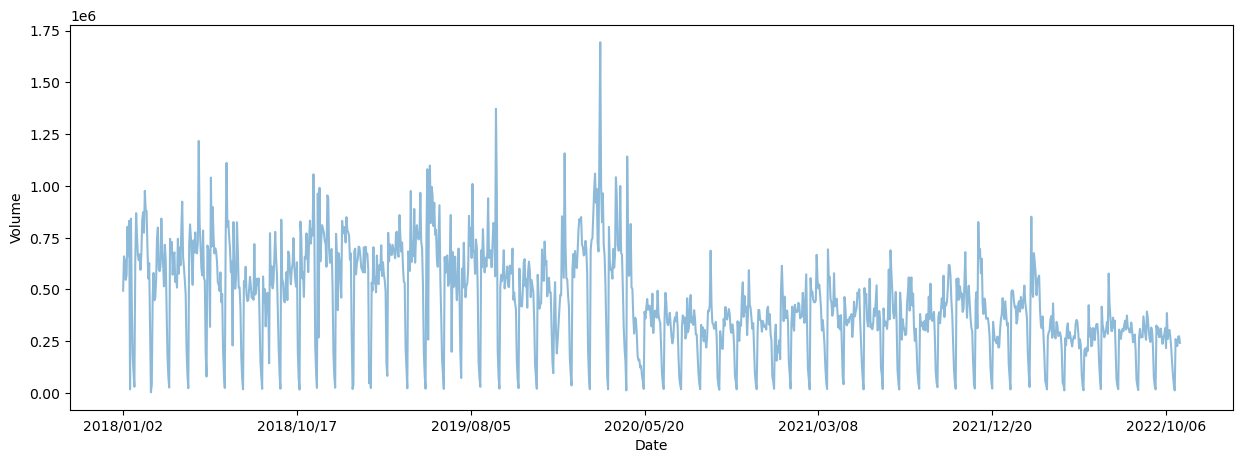

In [13]:
df1['Volume'].plot(figsize=(15,5),ylabel = "Volume", alpha=0.5)

<Axes: xlabel='Date'>

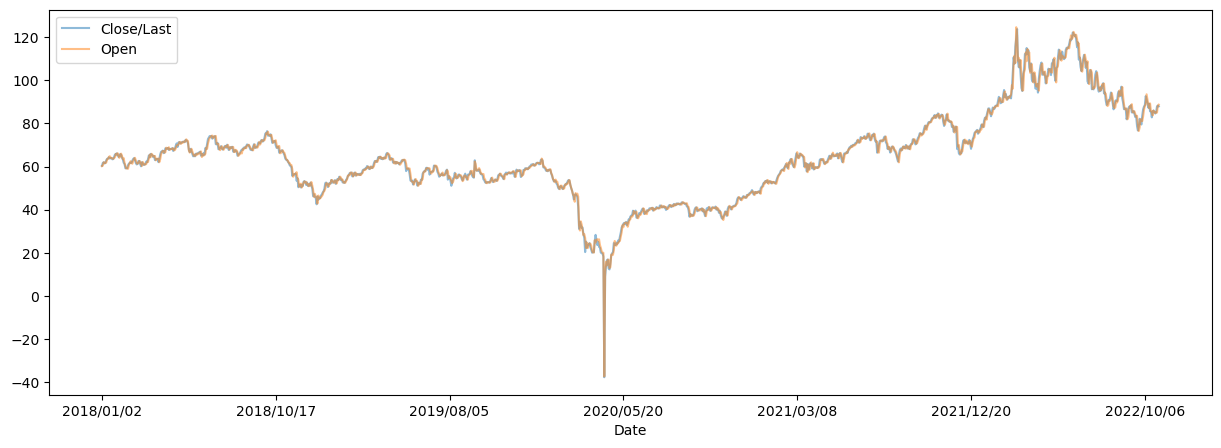

In [18]:
df1[['Close/Last','Open']].plot(figsize=(15,5),alpha=0.5)

<Axes: xlabel='Date'>

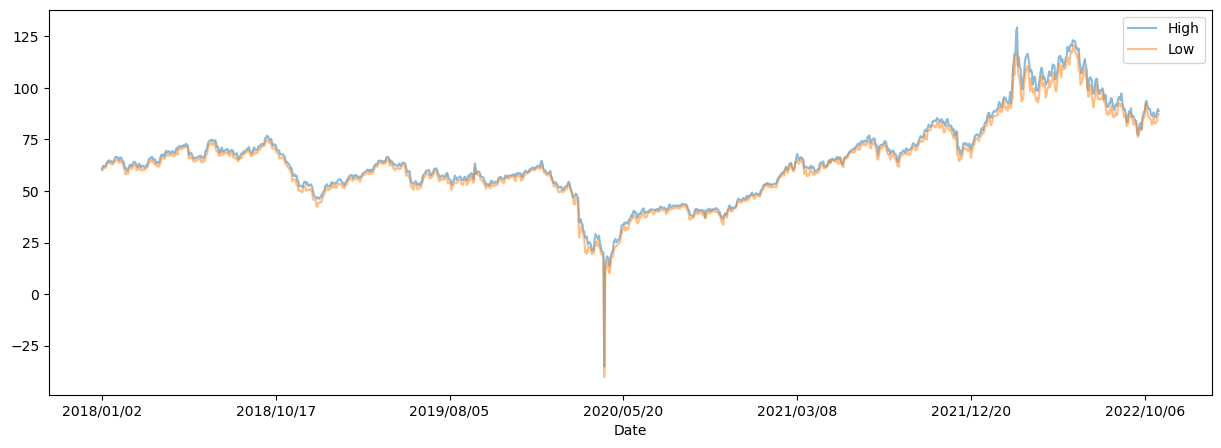

In [19]:
df1[['High','Low']].plot(figsize=(15,5),alpha=0.5)

#### Starting from 2018 till end of 2019 it has been steady trend in the oil stock prices.
####  There is sharp downfall in end of 2019.
#### Then again it started to increase after 2020

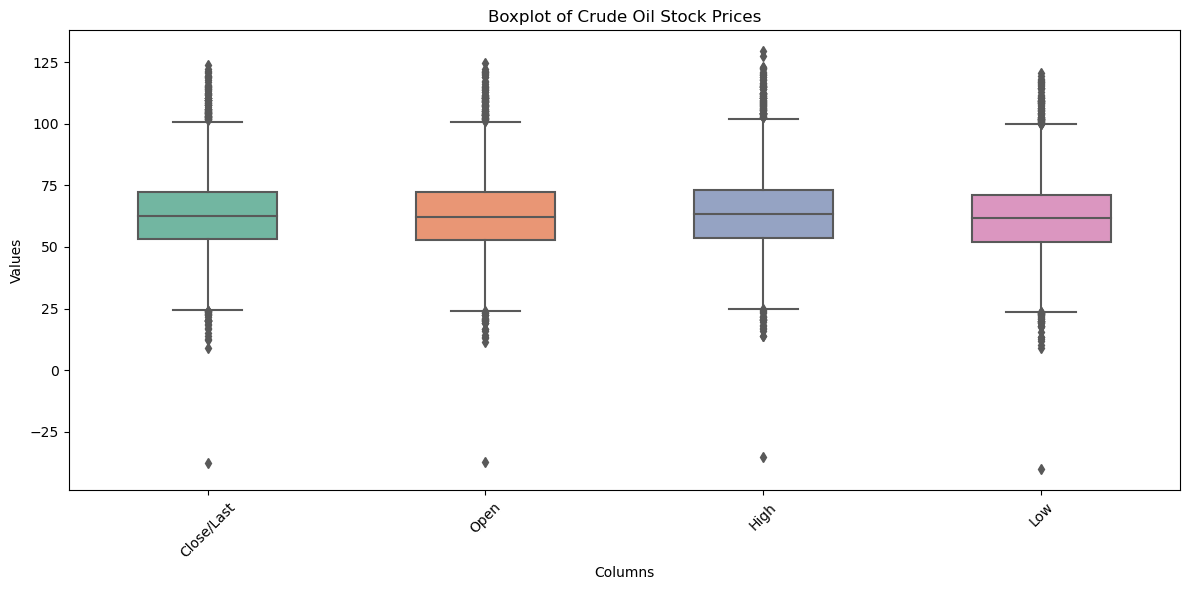

In [23]:
# Create a boxplot with different colors for each column
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")  # Set the color palette

# Specify the columns you want to include in the boxplot
columns_to_plot = ['Close/Last', 'Open', 'High', 'Low']

# Create the boxplot
sns.boxplot(data=df[columns_to_plot], width=0.5)
plt.title('Boxplot of Crude Oil Stock Prices')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

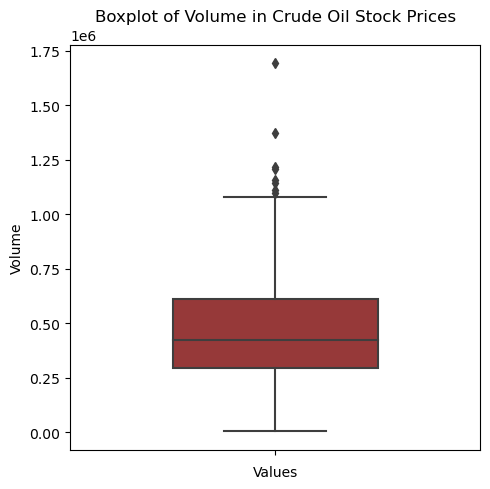

In [29]:
# Create a boxplot for 'volume' with a separate color (brown)
plt.figure(figsize=(5, 5))
sns.set_palette("Set2")  # Set the color palette

# Create the boxplot for 'volume' with the desired color
sns.boxplot(y='Volume', data=df, color='brown', width=0.5)
plt.title('Boxplot of Volume in Crude Oil Stock Prices')
plt.xlabel('Values')
plt.ylabel('Volume')

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
b = df1.sort_values(by ='Low',ascending=True).head(5)
b['Low']

Date
2020/04/20   -40.32
2020/04/21     8.91
2020/04/28    10.07
2020/04/27    11.88
2020/04/29    12.67
Name: Low, dtype: float64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

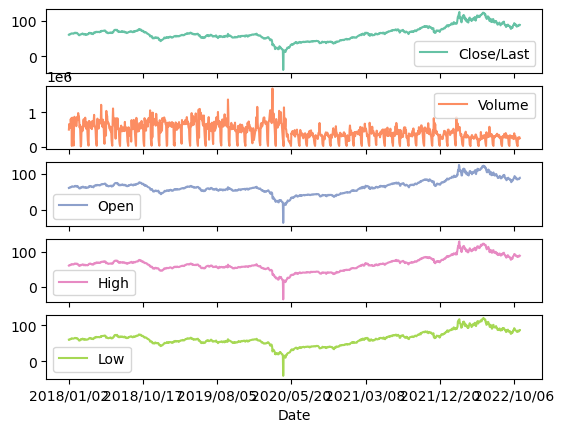

In [32]:
df1.plot(subplots=True)

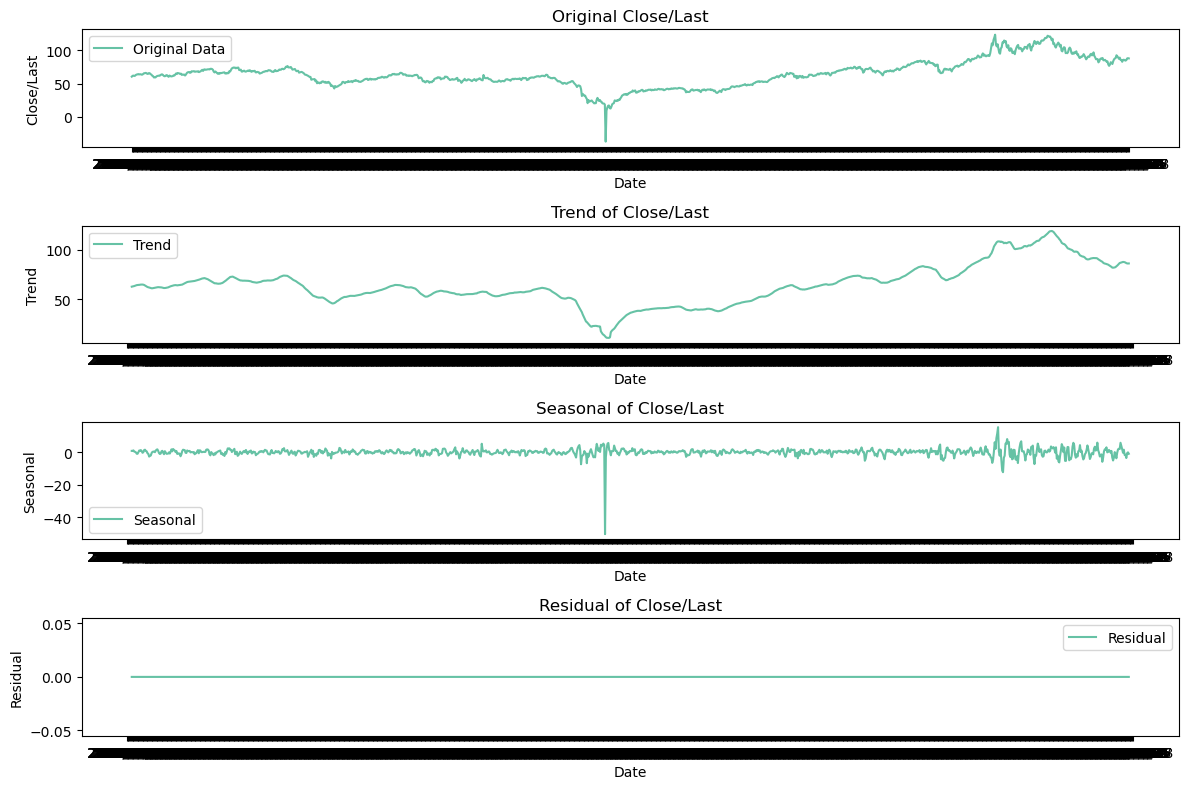

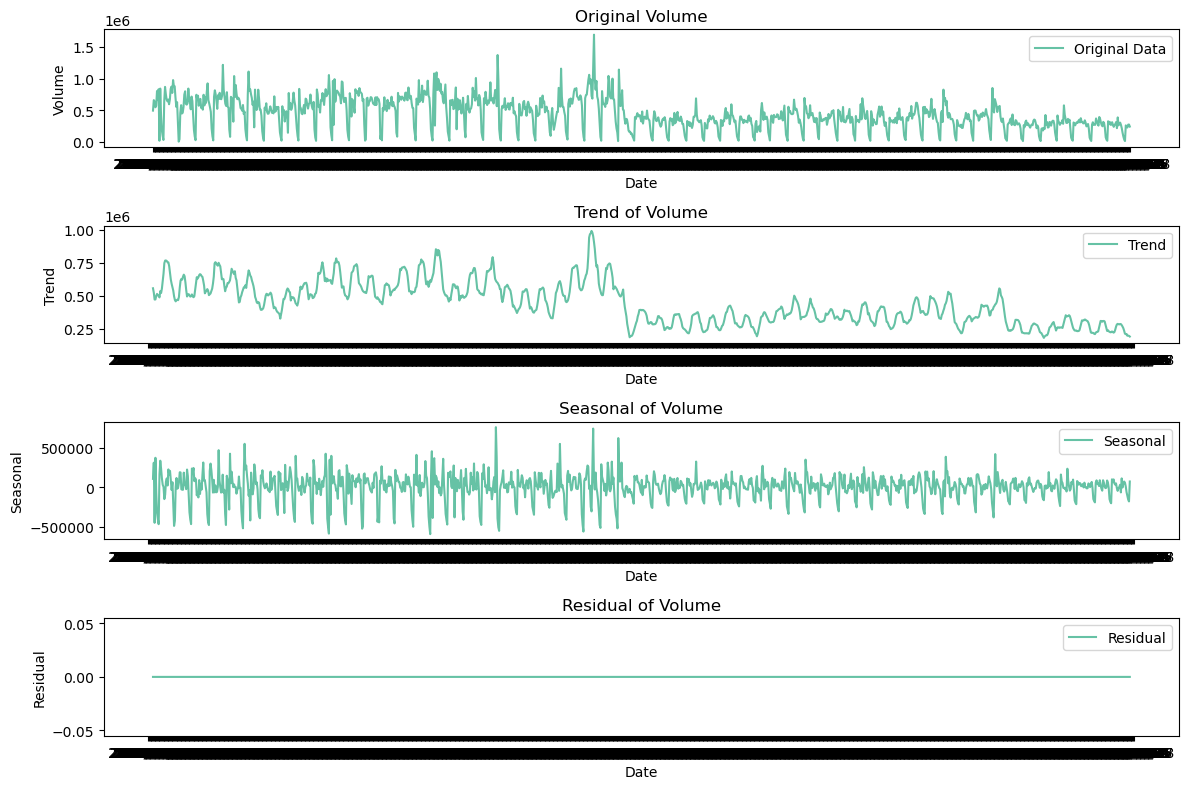

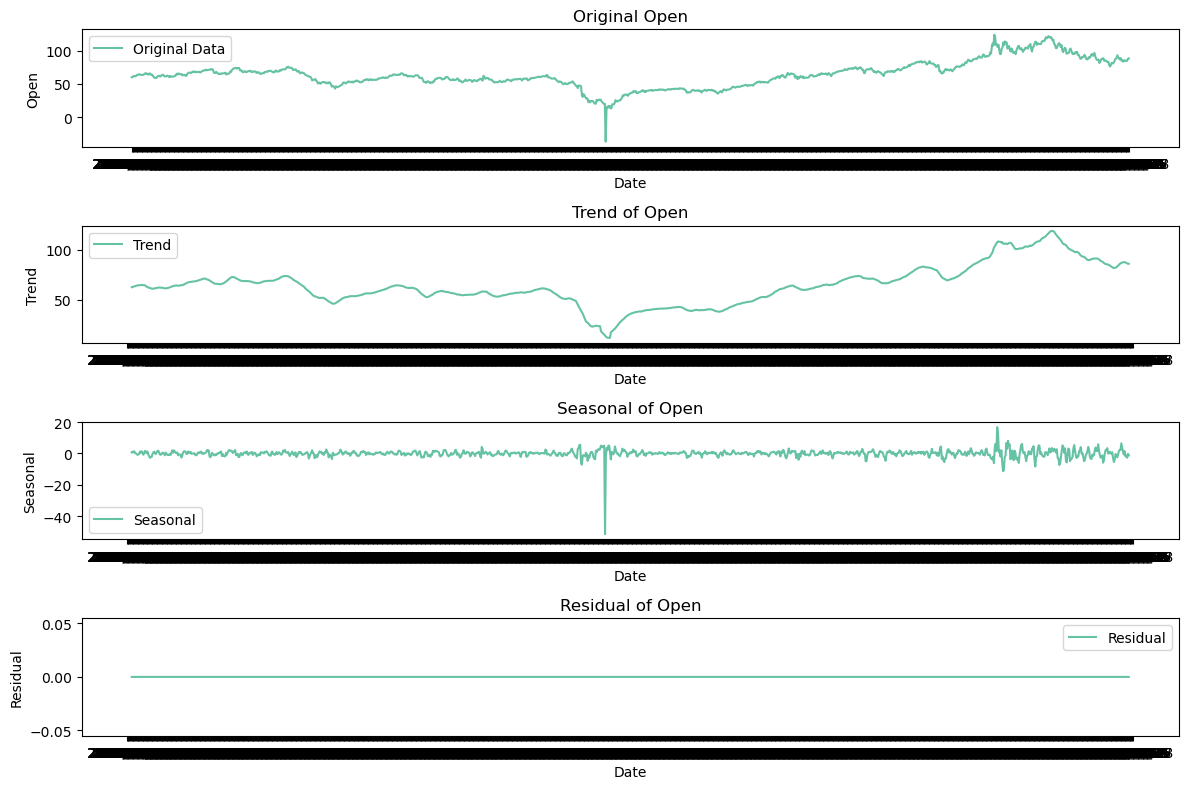

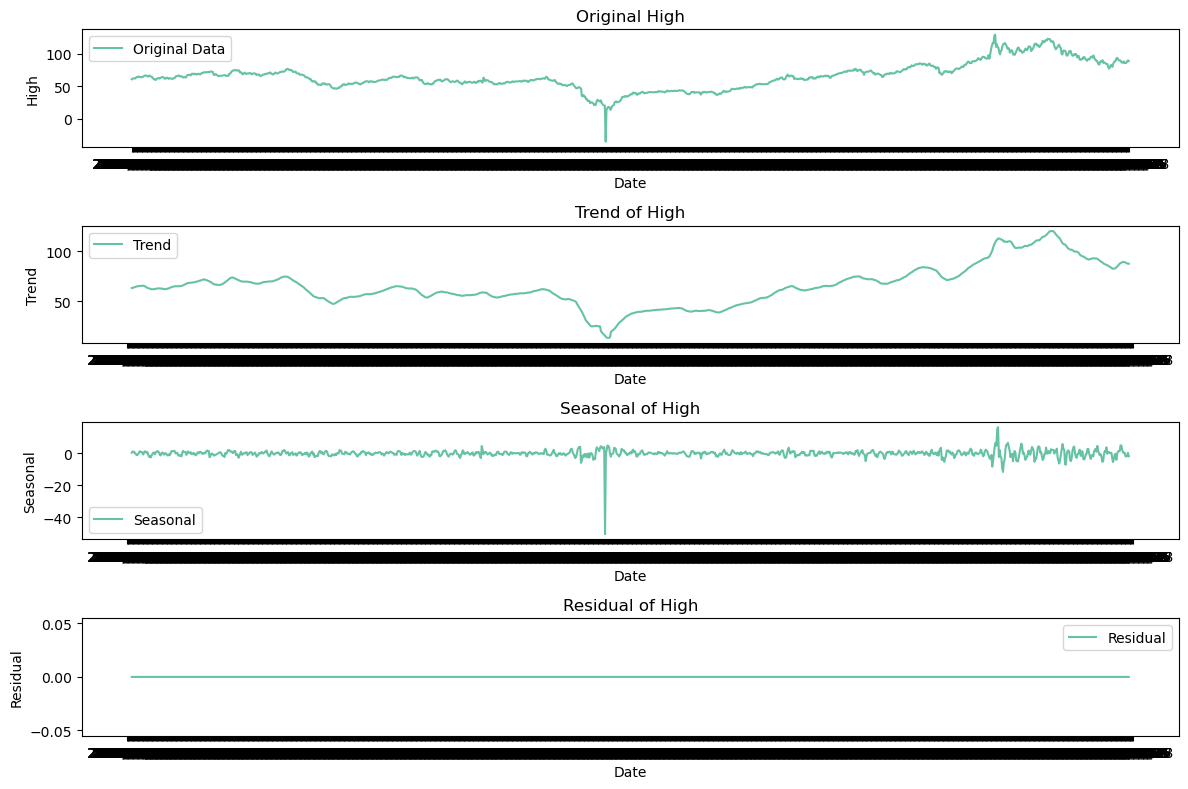

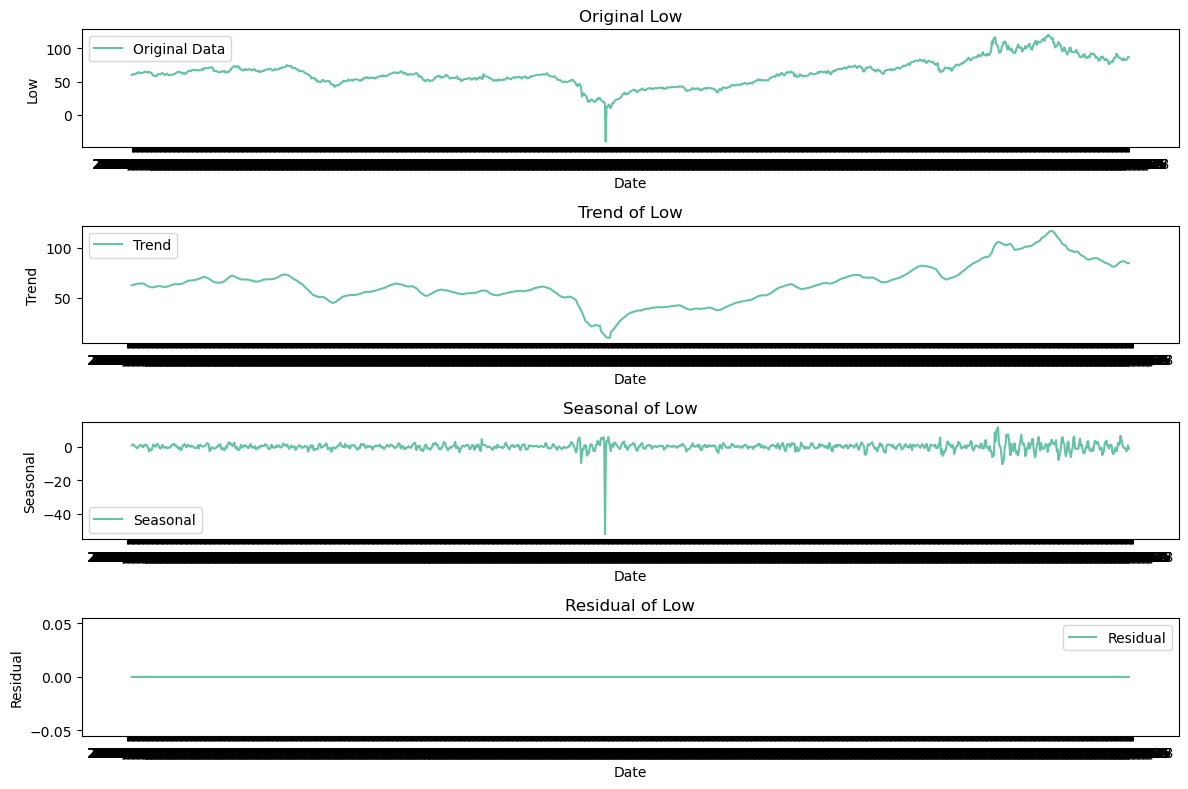

In [38]:
columns_to_decompose = ['Close/Last', 'Volume', 'Open', 'High', 'Low']

# Define the seasonal period (e.g., 12 for monthly data)
seasonal_period = 12

# Perform additive seasonality decomposition for each column
for column in columns_to_decompose:
    # Calculate the rolling mean (trend component)
    trend = df1[column].rolling(window=seasonal_period, center=True).mean()

    # Calculate the seasonal component
    seasonal = df1[column] - trend

    # Calculate the residual component
    residual = df1[column] - (trend + seasonal)

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(df1[column], label='Original Data')
    plt.title(f'Original {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend')
    plt.title(f'Trend of {column}')
    plt.xlabel('Date')
    plt.ylabel('Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonal')
    plt.title(f'Seasonal of {column}')
    plt.xlabel('Date')
    plt.ylabel('Seasonal')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual')
    plt.title(f'Residual of {column}')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

C:\Users\A\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


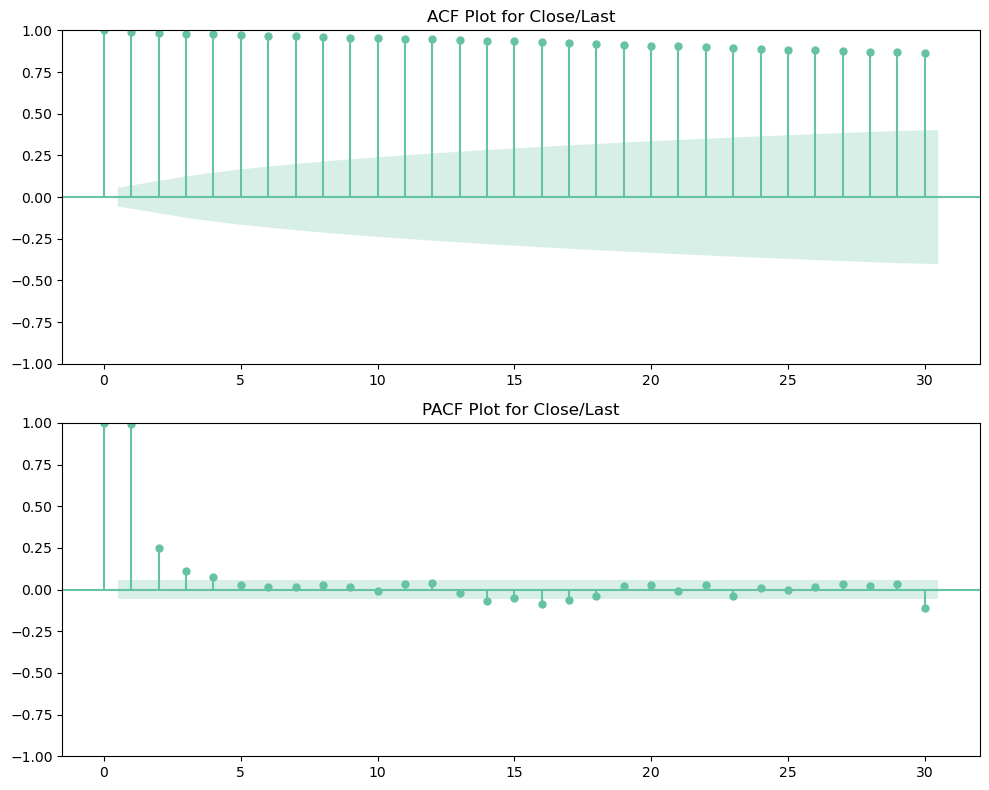

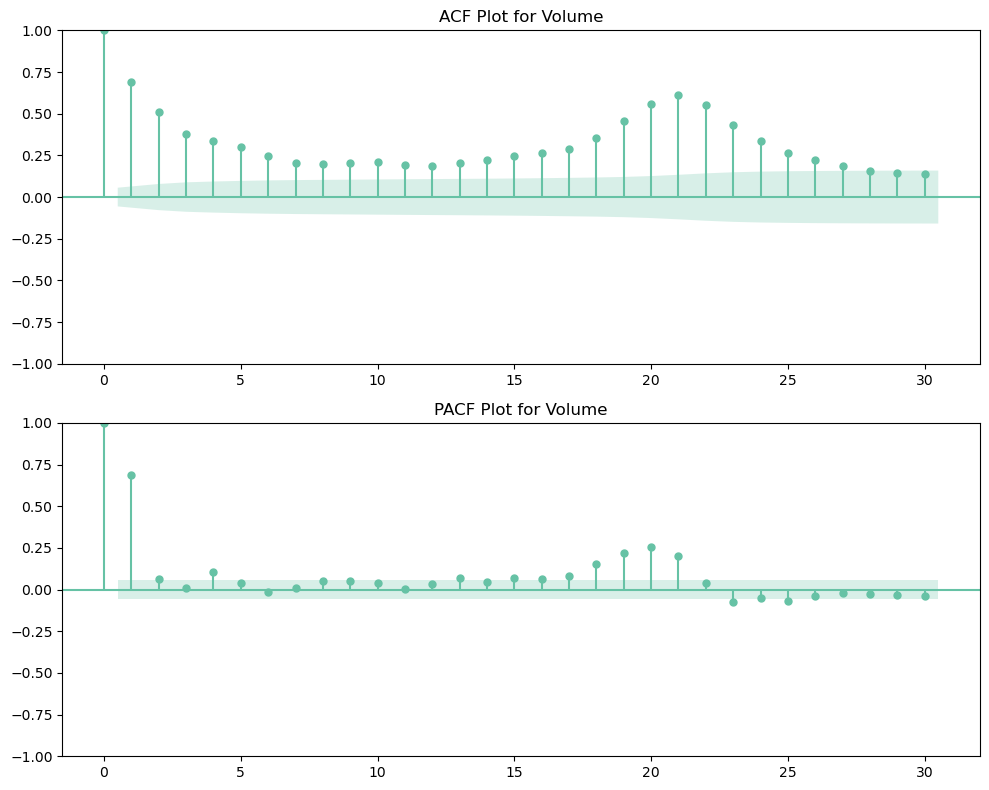

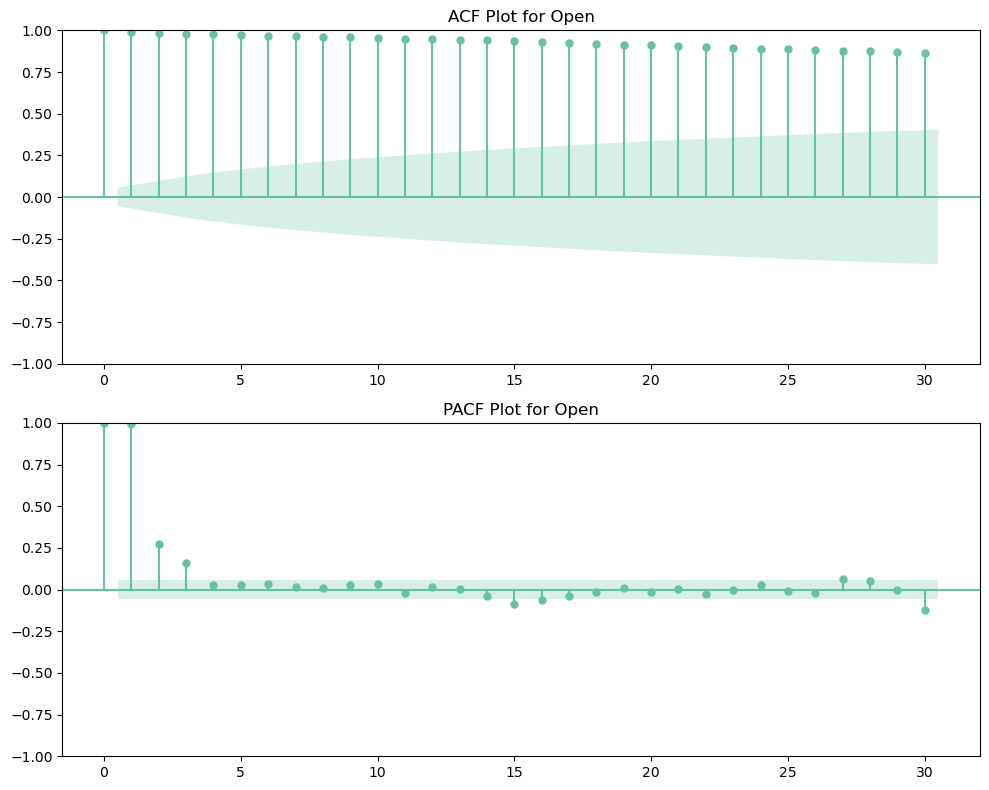

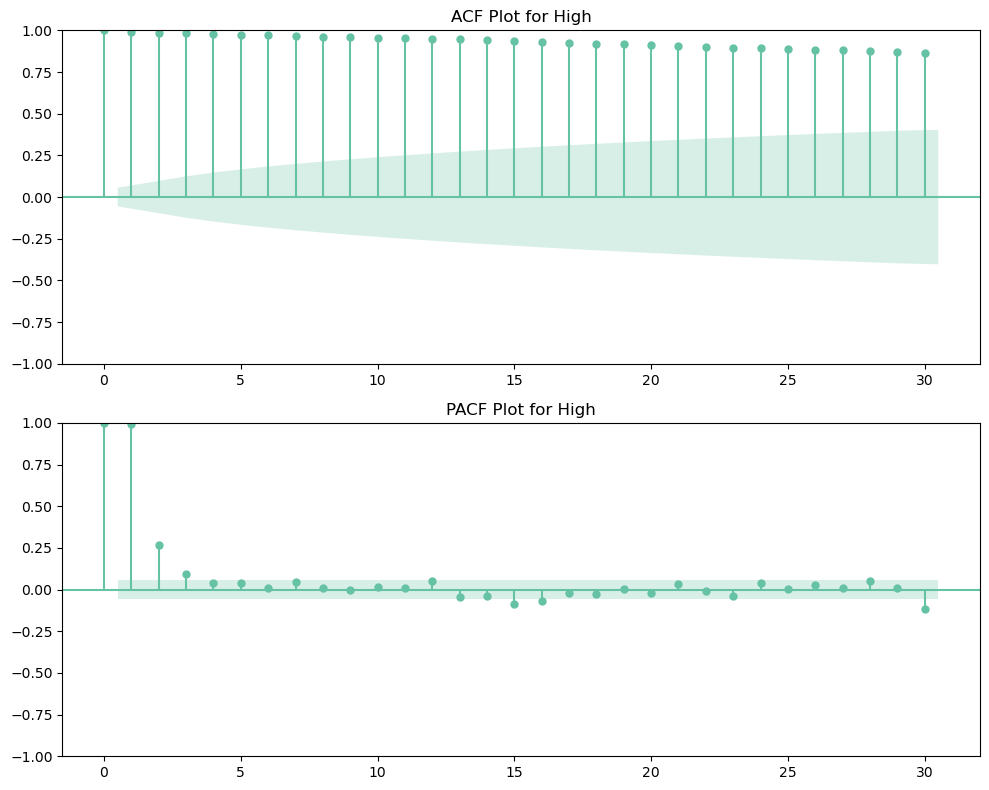

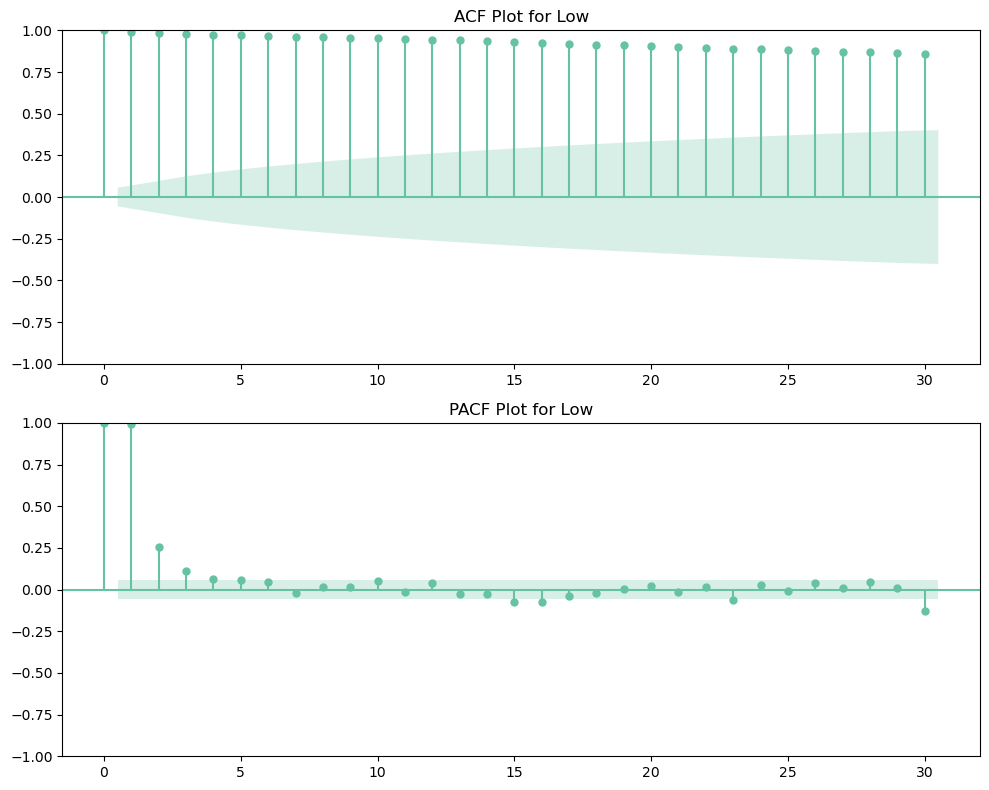

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Specify the columns you want to create ACF and PACF plots for
columns_to_plot = ['Close/Last', 'Volume', 'Open', 'High', 'Low']

# Define the number of lags to consider in the ACF and PACF plots
max_lag = 30  # Adjust as needed

# Create ACF and PACF plots for each column
for column in columns_to_plot:
    # Create subplots for ACF and PACF
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # ACF plot
    plot_acf(df1[column], lags=max_lag, ax=ax1)
    ax1.set_title(f'ACF Plot for {column}')
    
    # PACF plot
    plot_pacf(df1[column], lags=max_lag, ax=ax2)
    ax2.set_title(f'PACF Plot for {column}')
    
    plt.tight_layout()
    plt.show()

##### For Checking the trend, Seasonality and to ascertain if the series is stationary, the ACF and PACF plots of the series are plotted.

##### The ACF plot shows constant pattern however the whole series does not show any trend. This give another justification to the fact that there is no seasonality in the series.

##### The ACF and PACF graphs also shows that the series is not stationary.

In [39]:
from statsmodels.tsa.stattools import adfuller


# Specify the columns you want to check for stationarity
columns_to_check = ['Close/Last', 'Volume', 'Open', 'High', 'Low']

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Perform Augmented Dickey-Fuller test for stationarity for each column
for column in columns_to_check:
    result = adfuller(df1[column])
    print(f'Column: {column}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

    if result[1] <= alpha:
        print(f'Result: Data is stationary (Reject null hypothesis)')
    else:
        print(f'Result: Data is not stationary (Fail to reject null hypothesis)')
    
    print('\n')


Column: Close/Last
ADF Statistic: -1.3438984549438178
p-value: 0.608857252292247
Critical Values:
  1%: -3.435752466943879
  5%: -2.8639256700182405
  10%: -2.5680401696175466
Result: Data is not stationary (Fail to reject null hypothesis)


Column: Volume
ADF Statistic: -1.829209574337789
p-value: 0.3660593805965323
Critical Values:
  1%: -3.43584323237365
  5%: -2.863965714307509
  10%: -2.5680614958661483
Result: Data is not stationary (Fail to reject null hypothesis)


Column: Open
ADF Statistic: -1.39121109210924
p-value: 0.5864823031998666
Critical Values:
  1%: -3.4357480073434905
  5%: -2.863923702481129
  10%: -2.568039121778048
Result: Data is not stationary (Fail to reject null hypothesis)


Column: High
ADF Statistic: -1.3972550627195697
p-value: 0.5835913661724539
Critical Values:
  1%: -3.4357480073434905
  5%: -2.863923702481129
  10%: -2.568039121778048
Result: Data is not stationary (Fail to reject null hypothesis)


Column: Low
ADF Statistic: -1.2621237100308922
p-val

In [40]:
# Specify the columns you want to make stationary
columns_to_difference = ['Close/Last', 'Volume', 'Open', 'High', 'Low']

# Define the order of differencing (usually 1 for first-order differencing)
differencing_order = 1

# Apply differencing to make each column stationary
for column in columns_to_difference:
    df1[f'{column}_diff'] = df1[column].diff(differencing_order)

# Drop rows with NaN values resulting from differencing
df1.dropna(inplace=True)

# Check if the differenced columns are now stationary using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

for column in columns_to_difference:
    result = adfuller(df1[f'{column}_diff'])
    print(f'Column: {column}_diff')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

    if result[1] <= 0.05:
        print(f'Result: Data is now stationary (Reject null hypothesis)')
    else:
        print(f'Result: Data is still not stationary (Fail to reject null hypothesis)')
    
    print('\n')

Column: Close/Last_diff
ADF Statistic: -24.636924670546765
p-value: 0.0
Critical Values:
  1%: -3.435752466943879
  5%: -2.8639256700182405
  10%: -2.5680401696175466
Result: Data is now stationary (Reject null hypothesis)


Column: Volume_diff
ADF Statistic: -12.074490954504775
p-value: 2.3069811778507006e-22
Critical Values:
  1%: -3.4358478507713777
  5%: -2.863967751840151
  10%: -2.568062580992973
Result: Data is now stationary (Reject null hypothesis)


Column: Open_diff
ADF Statistic: -32.22152847559997
p-value: 0.0
Critical Values:
  1%: -3.4357480073434905
  5%: -2.863923702481129
  10%: -2.568039121778048
Result: Data is now stationary (Reject null hypothesis)


Column: High_diff
ADF Statistic: -30.226209320313398
p-value: 0.0
Critical Values:
  1%: -3.4357480073434905
  5%: -2.863923702481129
  10%: -2.568039121778048
Result: Data is now stationary (Reject null hypothesis)


Column: Low_diff
ADF Statistic: -18.64774859500236
p-value: 2.0518253056531558e-30
Critical Values:
 

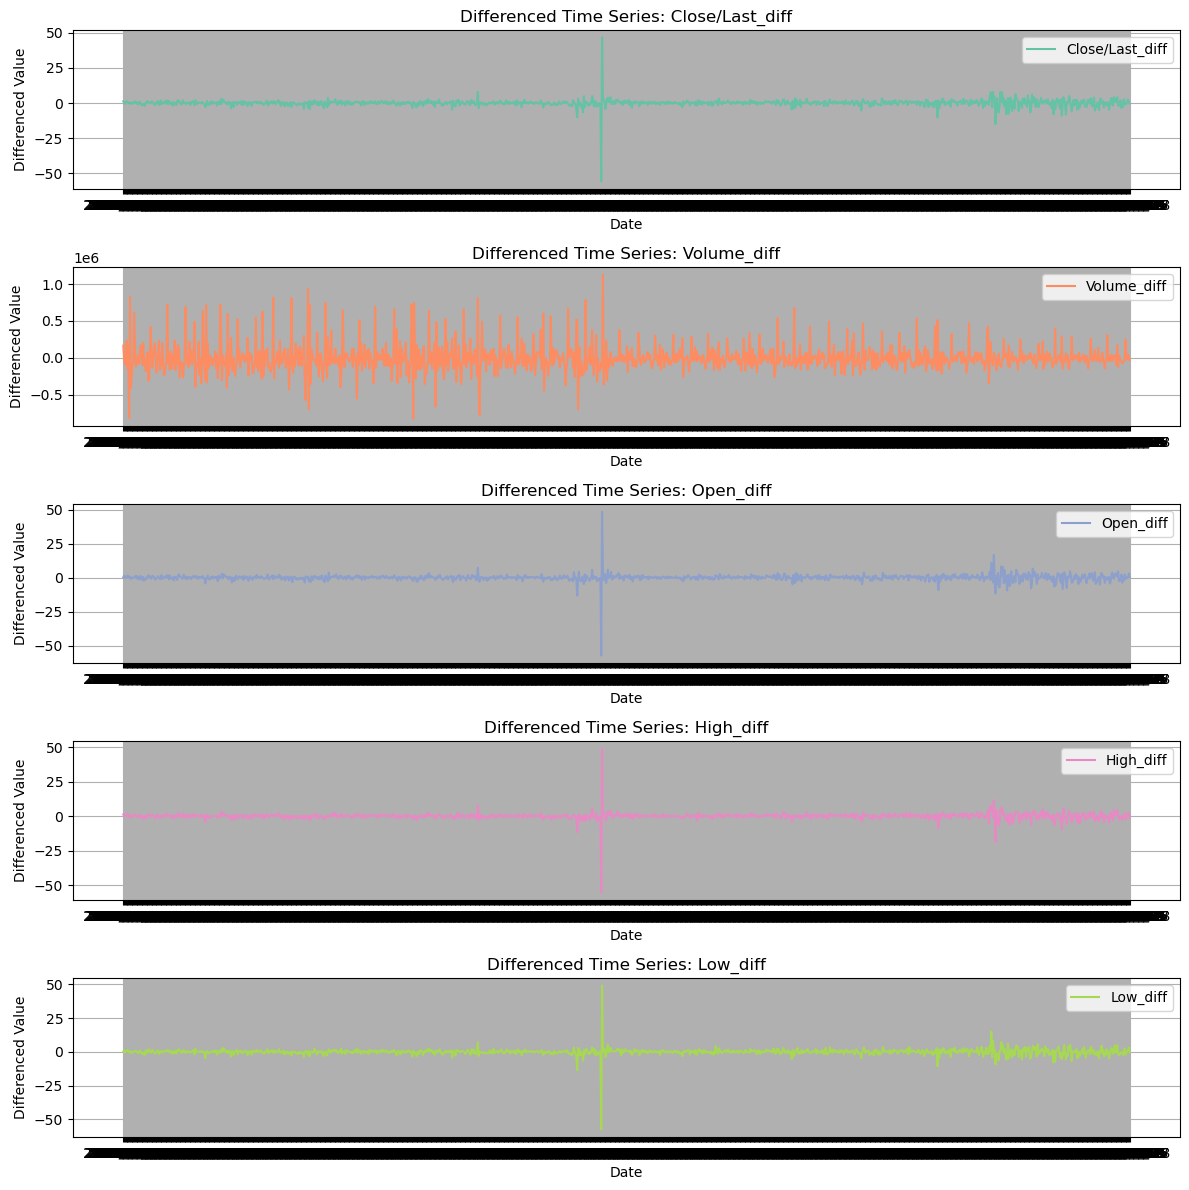

In [45]:
# Specify the columns with differenced data
differenced_columns = ['Close/Last_diff', 'Volume_diff', 'Open_diff', 'High_diff', 'Low_diff']

# Create separate plots for each differenced column with different colors
plt.figure(figsize=(12, 12))

for i, column in enumerate(differenced_columns):
    plt.subplot(len(differenced_columns), 1, i + 1)
    plt.plot(df1.index, df1[column], label=column, color=f'C{i}')  # Using different colors for each plot
    plt.title(f'Differenced Time Series: {column}')
    plt.xlabel('Date')
    plt.ylabel('Differenced Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

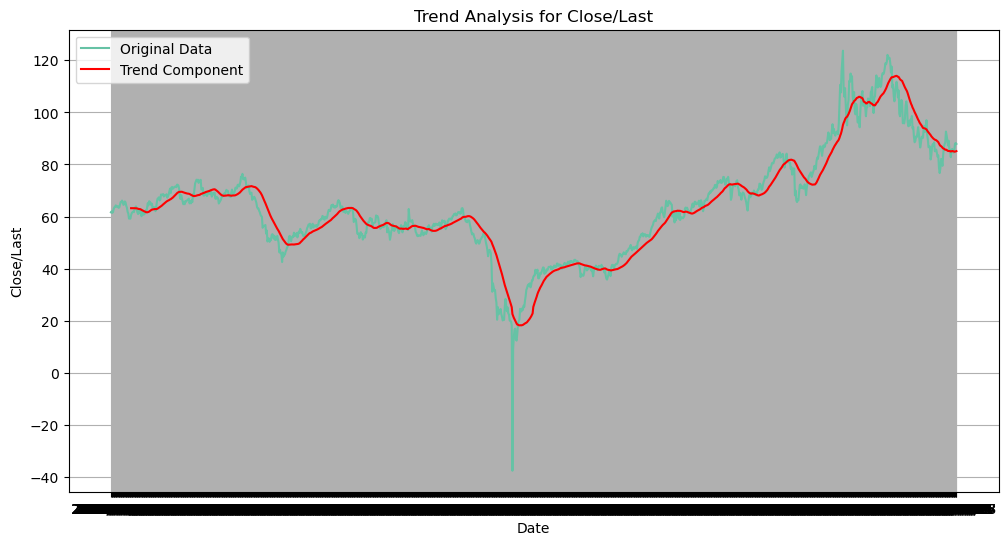

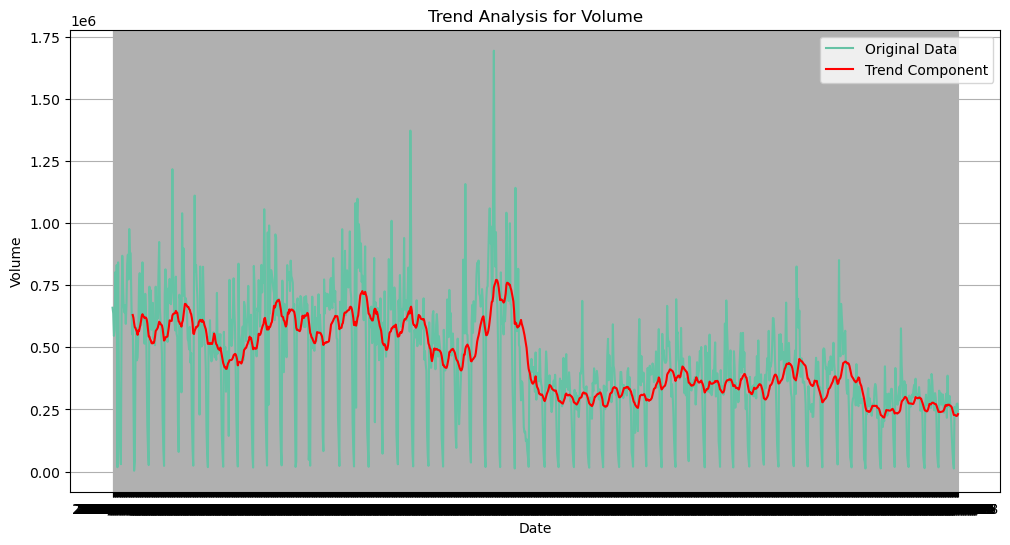

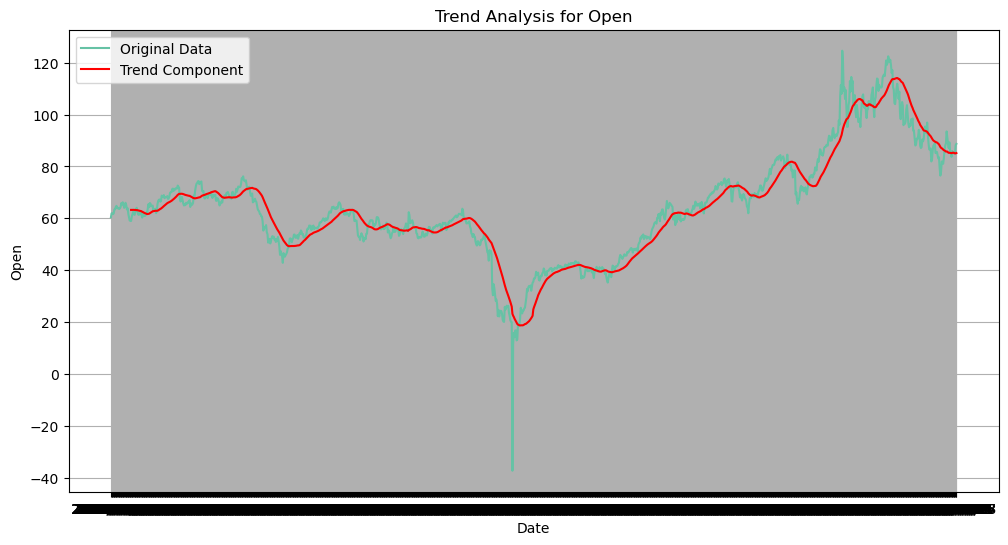

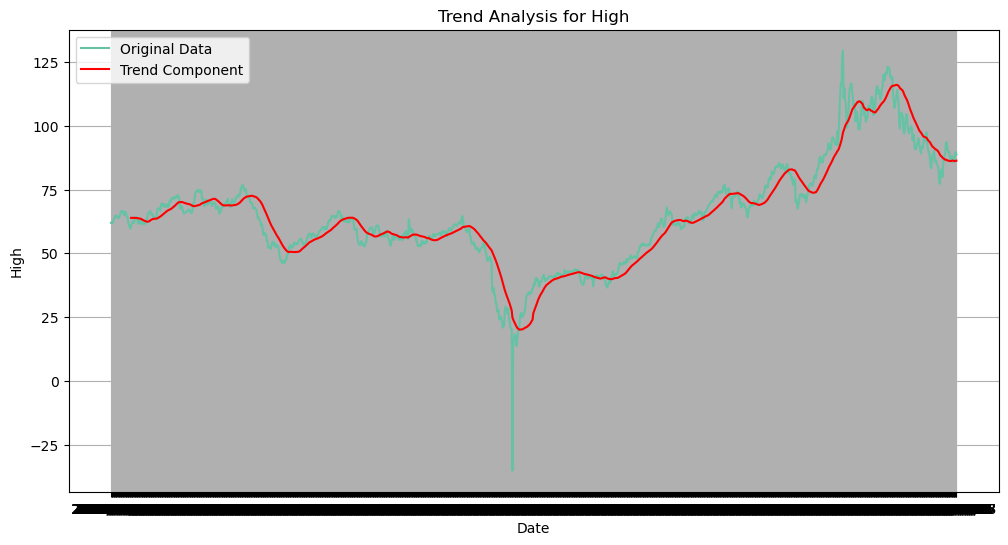

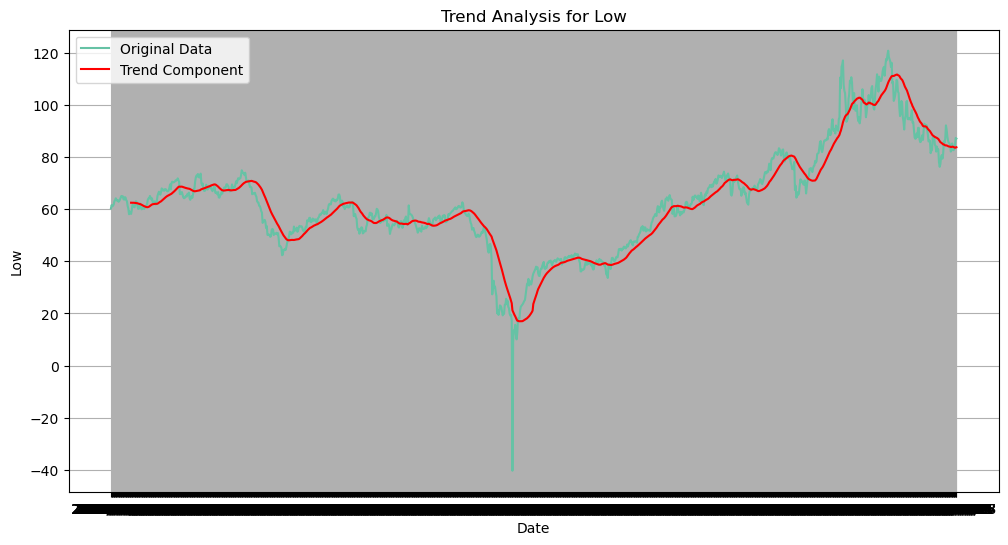

Column: Close/Last_detrend
ADF Statistic: -5.714550417864067
p-value: 7.170923873832598e-07
Critical Values:
  1%: -3.4358897684764886
  5%: -2.8639862448409055
  10%: -2.5680724298154542
Result: Data is stationary after detrending (Reject null hypothesis)


Column: Volume_detrend
ADF Statistic: -5.452416779454868
p-value: 2.6263937203390208e-06
Critical Values:
  1%: -3.4359852468525345
  5%: -2.864028366455392
  10%: -2.568094862687227
Result: Data is stationary after detrending (Reject null hypothesis)


Column: Open_detrend
ADF Statistic: -5.90470527975151
p-value: 2.7258645267545226e-07
Critical Values:
  1%: -3.4358850794152054
  5%: -2.8639841761618654
  10%: -2.568071328096466
Result: Data is stationary after detrending (Reject null hypothesis)


Column: High_detrend
ADF Statistic: -5.950044390646155
p-value: 2.1579889612265887e-07
Critical Values:
  1%: -3.4358850794152054
  5%: -2.8639841761618654
  10%: -2.568071328096466
Result: Data is stationary after detrending (Reject n

In [47]:
# Specify the columns you want to analyze and potentially detrend
columns_to_detrend = ['Close/Last', 'Volume', 'Open', 'High', 'Low']

# Define the window size for the moving average (adjust as needed)
window_size = 30  # Example: 30-day moving average

# Perform trend analysis and detrending for each column
for column in columns_to_detrend:
    # Calculate the rolling mean (trend component)
    trend = df1[column].rolling(window=window_size).mean()
    
    # Plot the original data and the trend component
    plt.figure(figsize=(12, 6))
    plt.plot(df1.index, df1[column], label='Original Data')
    plt.plot(df1.index, trend, label='Trend Component', color='red')
    plt.title(f'Trend Analysis for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Detrend the data by subtracting the trend component
    df1[f'{column}_detrend'] = df1[column] - trend

# Check if the detrended columns have trends
detrended_columns = [f'{column}_detrend' for column in columns_to_detrend]

for detrended_column in detrended_columns:
    # Perform Augmented Dickey-Fuller test for stationarity on the detrended data
    result = adfuller(df1[detrended_column].dropna())
    
    print(f'Column: {detrended_column}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

    if result[1] <= 0.05:
        print(f'Result: Data is stationary after detrending (Reject null hypothesis)')
    else:
        print(f'Result: Data still has a trend after detrending (Fail to reject null hypothesis)')
    
    print('\n')

In [7]:
df1.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Model Training

## ARIMA, SARIMA, ARIMAX and SARIMAX

In [13]:
import pandas as pd
import numpy as np
import pmdarima as pm
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Splitting the dataset into X (features) and Y (target)
X = df1[['Volume','Open', 'High', 'Low']]
Y = df1['Close/Last']

# Function to fit ARIMA model and calculate RMSE, MAE, and MAPE
def fit_ARIMA(X, Y):
    model = pm.auto_arima(Y, exogenous=X, seasonal=True, m=12, stepwise=True, suppress_warnings=True)
    Y_pred = model.predict_in_sample(exogenous=X)
    
    rmse = sqrt(mean_squared_error(Y, Y_pred))
    mae = mean_absolute_error(Y, Y_pred)
    mape = (np.abs((Y - Y_pred) / Y)).mean() * 100
    
    return model, rmse, mae, mape

# Function to fit SARIMA model and calculate RMSE, MAE, and MAPE
def fit_SARIMA(X, Y):
    mod = sm.tsa.statespace.SARIMAX(Y, exog=X, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
    sarima_results = mod.fit()
    Y_pred = sarima_results.predict(exog=X)
    
    rmse = sqrt(mean_squared_error(Y, Y_pred))
    mae = mean_absolute_error(Y, Y_pred)
    mape = (np.abs((Y - Y_pred) / Y)).mean() * 100
    
    return sarima_results, rmse, mae, mape


# Function to fit SARIMAX model and calculate RMSE, MAE, and MAPE
def fit_SARIMAX(X, Y):
    # Replace this with appropriate SARIMAX modeling code
    # You need to define the order, seasonal_order, and exog parameters
    mod = sm.tsa.SARIMAX(Y, exog=X, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
    sarimax_results = mod.fit()
    Y_pred = sarimax_results.predict(exog=X)
    
    rmse = sqrt(mean_squared_error(Y, Y_pred))
    mae = mean_absolute_error(Y, Y_pred)
    mape = (np.abs((Y - Y_pred) / Y)).mean() * 100
    
    return sarimax_results, rmse, mae, mape

# Create a list of models and their corresponding metrics
models = []

arima_model, arima_rmse, arima_mae, arima_mape = fit_ARIMA(X, Y)
models.append(('ARIMA', arima_model, arima_rmse, arima_mae, arima_mape))

sarima_model, sarima_rmse, sarima_mae, sarima_mape = fit_SARIMA(X, Y)
models.append(('SARIMA', sarima_model, sarima_rmse, sarima_mae, sarima_mape))

arimax_model, arimax_rmse, arimax_mae, arimax_mape = fit_SARIMAX(X, Y)  # Change this to fit_SARIMAX
models.append(('ARIMAX', arimax_model, arimax_rmse, arimax_mae, arimax_mape))

sarimax_model, sarimax_rmse, sarimax_mae, sarimax_mape = fit_SARIMAX(X, Y)
models.append(('SARIMAX', sarimax_model, sarimax_rmse, sarimax_mae, sarimax_mape))

# Create a table of model metrics in descending order of RMSE
models.sort(key=lambda x: x[2], reverse=True)

# Print the model table with RMSE, MAE, MAPE, and accuracy
for name, model, rmse, mae, mape in models:
    accuracy = 1 - (rmse / Y.std())
    print(f'{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}%, Accuracy={accuracy:.2%}')


ARIMA: RMSE=3.17, MAE=1.39, MAPE=2.68%, Accuracy=84.22%
SARIMA: RMSE=0.80, MAE=0.57, MAPE=0.96%, Accuracy=96.04%
ARIMAX: RMSE=0.80, MAE=0.57, MAPE=0.96%, Accuracy=96.04%
SARIMAX: RMSE=0.80, MAE=0.57, MAPE=0.96%, Accuracy=96.04%


### VISUALISATION

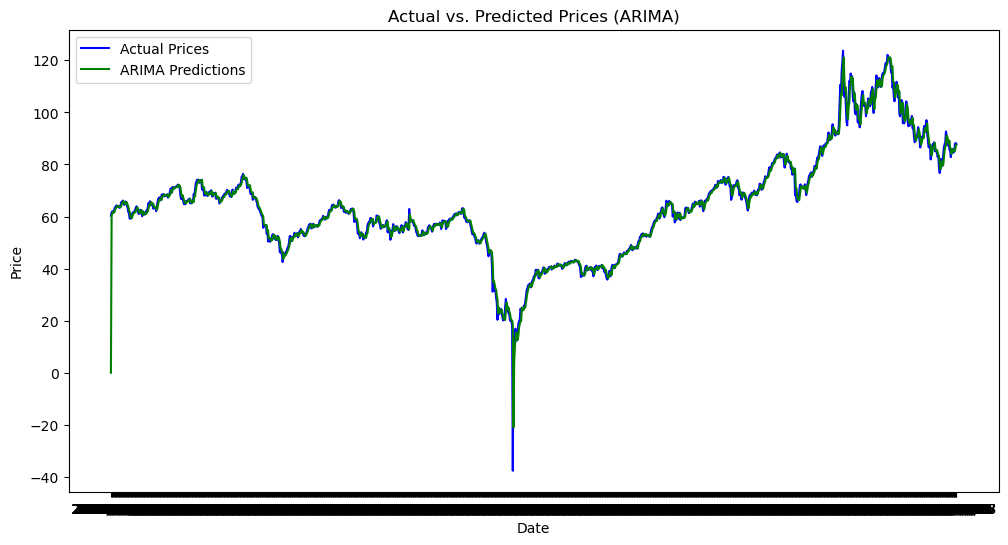

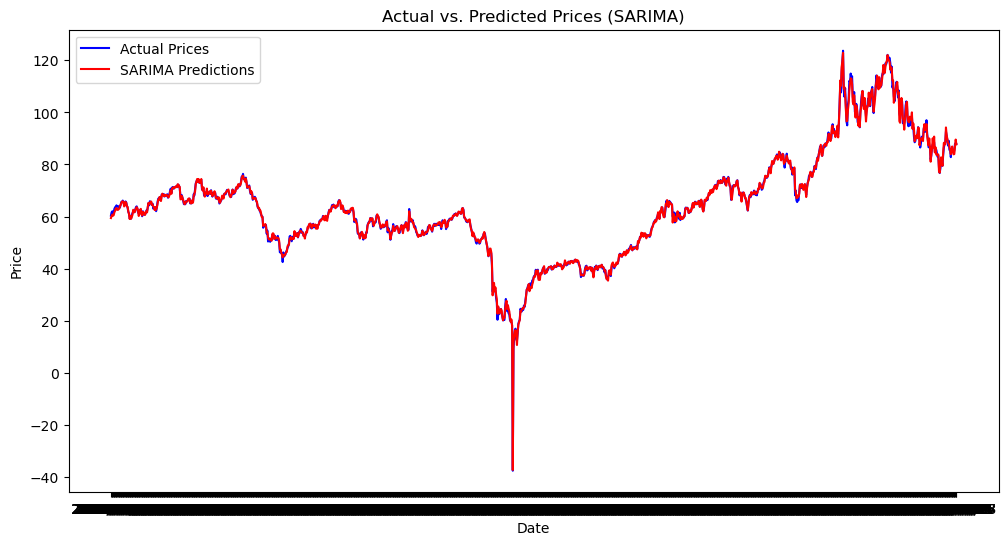

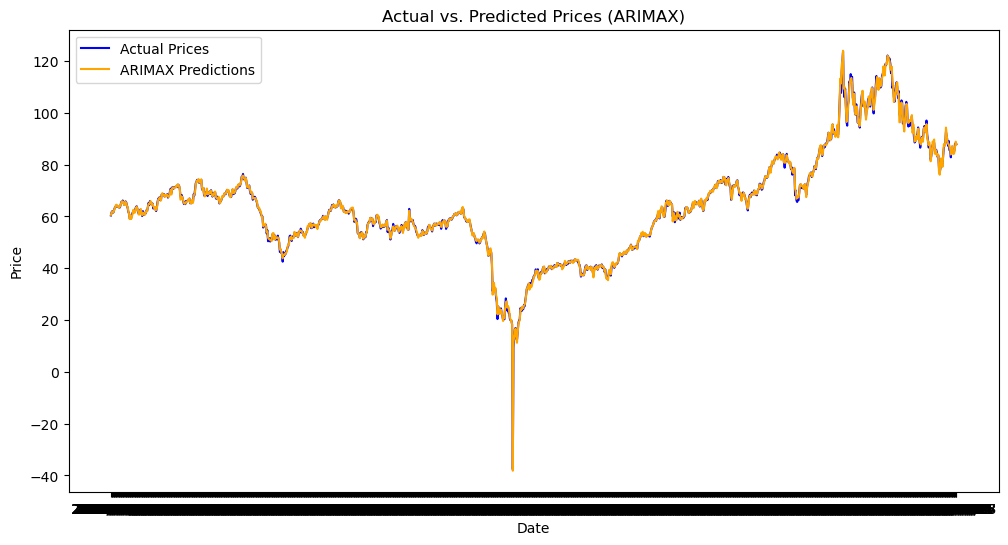

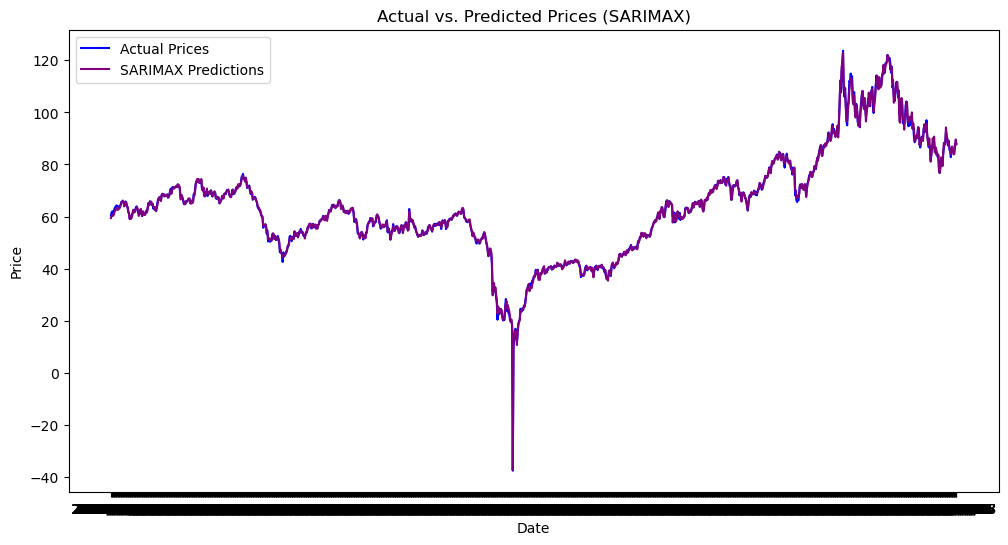

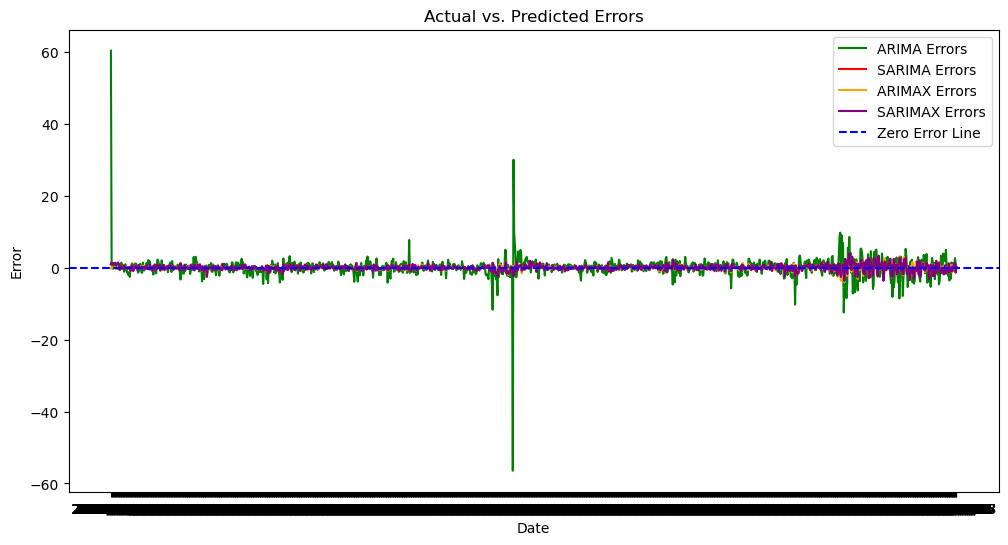

In [95]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices for ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual Prices', color='blue')
plt.plot(Y.index, arima_model.predict_in_sample(exogenous=X), label='ARIMA Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (ARIMA)')
plt.legend()
plt.show()

# Plot actual vs. predicted prices for SARIMA model
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual Prices', color='blue')
plt.plot(Y.index, sarima_model.predict(exog=X), label='SARIMA Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (SARIMA)')
plt.legend()
plt.show()

# Plot actual vs. predicted prices for ARIMAX model
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual Prices', color='blue')
plt.plot(Y.index, arimax_model.predict(exog=X), label='ARIMAX Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (ARIMAX)')
plt.legend()
plt.show()

# Plot actual vs. predicted prices for SARIMAX model
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual Prices', color='blue')
plt.plot(Y.index, sarimax_model.predict(exog=X), label='SARIMAX Predictions', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (SARIMAX)')
plt.legend()
plt.show()


# Plot actual vs. predicted errors
arima_errors = Y - arima_model.predict_in_sample(exogenous=X)
sarima_errors = Y - sarima_model.predict(exog=X)
arimax_errors = Y - arimax_model.predict(exog=X)
sarimax_errors = Y - sarimax_model.predict(exog=X)

plt.figure(figsize=(12, 6))
plt.plot(Y.index, arima_errors, label='ARIMA Errors', color='green')
plt.plot(Y.index, sarima_errors, label='SARIMA Errors', color='red')
plt.plot(Y.index, arimax_errors, label='ARIMAX Errors', color='orange')
plt.plot(Y.index, sarimax_errors, label='SARIMAX Errors', color='purple')
plt.axhline(0, color='blue', linestyle='--', label='Zero Error Line')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Actual vs. Predicted Errors')
plt.legend()
plt.show()

## SEASONAL NAIVE 

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function for Seasonal Naive Forecasting
def seasonal_naive_forecast(Y):
    Y_pred = Y.shift(12)  # Assuming a seasonal period of 12 months
    Y_pred = Y_pred[12:]  # Drop the NaN values
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(Y[12:], Y_pred))
    
    # Calculate MAE
    mae = mean_absolute_error(Y[12:], Y_pred)
    
    # Calculate MAPE
    mape = (np.abs((Y[12:] - Y_pred) / Y[12:])).mean() * 100
    
    return Y_pred, rmse, mae, mape

# Seasonal Naive Forecasting
naive_forecast, naive_rmse, naive_mae, naive_mape = seasonal_naive_forecast(Y)

print(f'Seasonal Naive Forecasting: RMSE={naive_rmse:.2f}, MAE={naive_mae:.2f}, MAPE={naive_mape:.2f}%')

Seasonal Naive Forecasting: RMSE=6.20, MAE=4.30, MAPE=8.08%


### VISUALISATION

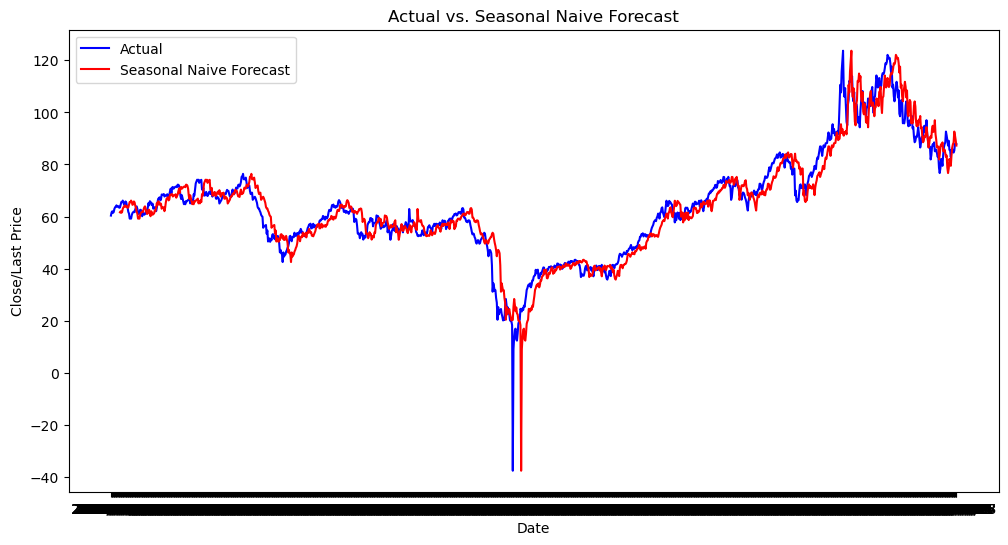

In [71]:
import matplotlib.pyplot as plt

# Plot actual vs. Seasonal Naive Forecast
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual', color='blue')
plt.plot(naive_forecast.index, naive_forecast, label='Seasonal Naive Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Actual vs. Seasonal Naive Forecast')
plt.legend()
plt.show()

## LSTM MODEL

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score


n_steps = 30  # You can adjust this as needed

# Function to create X and y from the dataset
def create_dataset(df1, n_steps):
    X, y = [], []
    for i in range(n_steps, len(df1)):
        X.append(df1[i - n_steps:i])
        y.append(df1[i, 0])  # Assuming 'Close' is the first column (adjust as needed)
    return np.array(X), np.array(y)

# Split the data into train and test sets
train_size = int(len(df1) * 0.8)  # 80% for training
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Extract the 'Close' column for scaling
train_close = train_df[['close']].values
test_close = test_df[['close']].values

# Scale the 'Close' prices using Min-Max scaling
scaler = MinMaxScaler()
train_close_scaled = scaler.fit_transform(train_close)
test_close_scaled = scaler.transform(test_close)

# Create X and y for training and testing
X_train, y_train = create_dataset(train_close_scaled, n_steps)
X_test, y_test = create_dataset(test_close_scaled, n_steps)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))  # 1 for the 'Close' column
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print("RMSE:", rmse)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print("MAE:", mae)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = (np.abs((y_test_actual - y_pred_actual) / y_test_actual)).mean() * 100
print("MAPE:", mape)

# Define a threshold for considering the forecast as 'Up' or 'Down' (you can adjust this threshold)
threshold = 0.0  # Adjust as needed

# Convert price changes to binary values (Up or Down)
y_pred_direction = np.where(y_pred_actual - y_test_actual > threshold, 1, 0)
y_test_direction = np.where(y_test_actual - y_test_actual > threshold, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test_direction, y_pred_direction)
print("Accuracy:", accuracy)

Epoch 1/50
30/30 [==============================] - 1s 11ms/step - loss: 0.1833
Epoch 2/50
30/30 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 3/50
30/30 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 4/50
30/30 [==============================] - 0s 11ms/step - loss: 9.8596e-04
Epoch 5/50
30/30 [==============================] - 0s 12ms/step - loss: 9.7137e-04
Epoch 6/50
30/30 [==============================] - 0s 13ms/step - loss: 9.5325e-04
Epoch 7/50
30/30 [==============================] - 0s 14ms/step - loss: 9.4580e-04
Epoch 8/50
30/30 [==============================] - 0s 14ms/step - loss: 9.3362e-04
Epoch 9/50
30/30 [==============================] - 0s 13ms/step - loss: 8.8062e-04
Epoch 10/50
30/30 [==============================] - 0s 13ms/step - loss: 9.1749e-04
Epoch 11/50
30/30 [==============================] - 0s 13ms/step - loss: 8.3278e-04
Epoch 12/50
30/30 [==============================] - 0s 14ms/step - loss: 8.4831e-04
E

# Visualisation

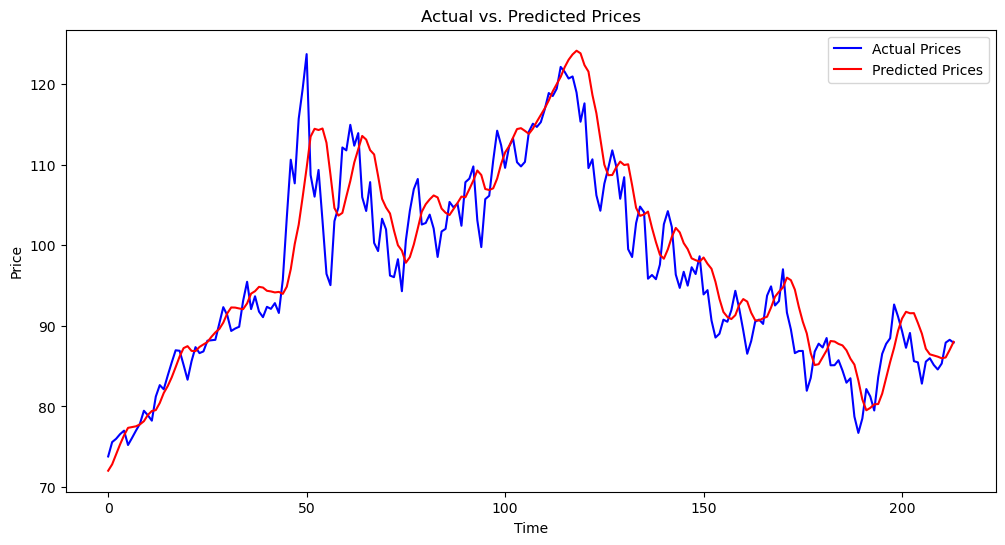

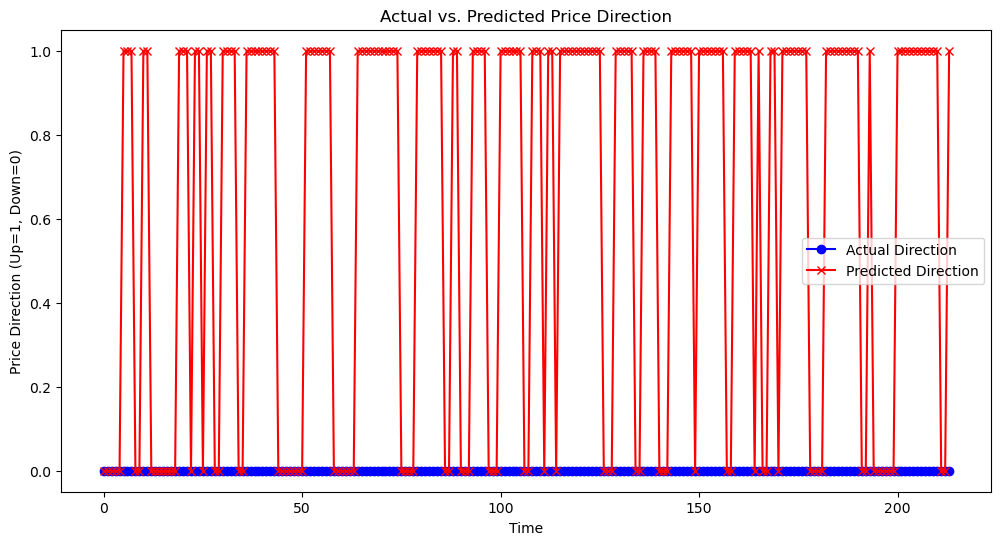

In [10]:
# Visualize the actual vs. predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(y_pred_actual, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Plot the binary price direction changes
plt.figure(figsize=(12, 6))
plt.plot(y_test_direction, label='Actual Direction', color='blue', marker='o')
plt.plot(y_pred_direction, label='Predicted Direction', color='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Price Direction (Up=1, Down=0)')
plt.title('Actual vs. Predicted Price Direction')
plt.legend()
plt.show()

Epoch 1/100
30/30 [==============================] - 4s 45ms/step - loss: 0.1334
Epoch 2/100
30/30 [==============================] - 2s 51ms/step - loss: 0.0101
Epoch 3/100
30/30 [==============================] - 1s 42ms/step - loss: 0.0078
Epoch 4/100
30/30 [==============================] - 1s 43ms/step - loss: 0.0077
Epoch 5/100
30/30 [==============================] - 1s 35ms/step - loss: 0.0075
Epoch 6/100
30/30 [==============================] - 1s 36ms/step - loss: 0.0072
Epoch 7/100
30/30 [==============================] - 1s 39ms/step - loss: 0.0063
Epoch 8/100
30/30 [==============================] - 1s 41ms/step - loss: 0.0066
Epoch 9/100
30/30 [==============================] - 1s 46ms/step - loss: 0.0060
Epoch 10/100
30/30 [==============================] - 1s 37ms/step - loss: 0.0057
Epoch 11/100
30/30 [==============================] - 1s 36ms/step - loss: 0.0064
Epoch 12/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0060
Epoch 13/100
30/30 [=====

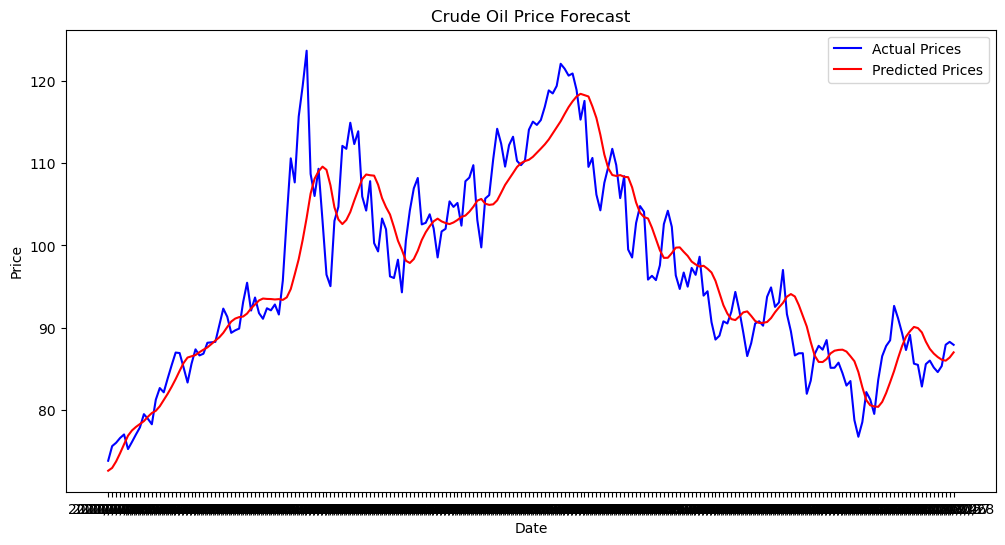

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Select 'Close' as the target variable
target_column = 'close'

# Create train and test sets
train_size = int(len(df1) * 0.8)
train_data = df1.iloc[:train_size]
test_data = df1.iloc[train_size:]

# Define the sequence length
n_steps = 30

# Function to create X and y from the dataset
def create_dataset(df, n_steps):
    X, y = [], []
    for i in range(n_steps, len(df)):
        X.append(df[i - n_steps:i])
        y.append(df[i, 0])  # Assuming 'Close' is the first column (adjust as needed)
    return np.array(X), np.array(y)

# Extract and scale 'Close' prices
scaler = MinMaxScaler()
train_close = scaler.fit_transform(train_data[['close']].values)
test_close = scaler.transform(test_data[['close']].values)

# Create X and y for training and testing
X_train, y_train = create_dataset(train_close, n_steps)
X_test, y_test = create_dataset(test_close, n_steps)

# Build an LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print("RMSE:", rmse)
print("MAE:", mae)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = (np.abs((y_test_actual - y_pred_actual) / y_test_actual)).mean() * 100
print("MAPE:", mape)

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[n_steps:], y_test_actual, label='Actual Prices', color='blue')
plt.plot(test_data.index[n_steps:], y_pred_actual, label='Predicted Prices', color='red')
plt.legend()
plt.title('Crude Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit


# Select 'Close' as the target variable
target_column = 'close'

# Create train and test sets
train_size = int(len(df1) * 0.8)
train_data = df1.iloc[:train_size]
test_data = df1.iloc[train_size:]

# Define the sequence length
n_steps = 30

# Function to create X and y from the dataset
def create_dataset(df, n_steps):
    X, y = [], []
    for i in range(n_steps, len(df)):
        X.append(df[i - n_steps:i])
        y.append(df[i, 0])  # Assuming 'Close' is the first column (adjust as needed)
    return np.array(X), np.array(y)

# Extract and scale 'Close' prices
scaler = MinMaxScaler()
train_close = scaler.fit_transform(train_data[['close']].values)
test_close = scaler.transform(test_data[['close']].values)

# Create X and y for training and testing
X_train, y_train = create_dataset(train_close, n_steps)
X_test, y_test = create_dataset(test_close, n_steps)

# Function to create an LSTM model with hyperparameters as input
def create_lstm_model(activation='relu', dropout_rate=0.2, neurons=50):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation, return_sequences=True, input_shape=(n_steps, 1)))
    model.add(LSTM(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameters to search
param_grid = {
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.3],
    'neurons': [50, 100, 150]
}

# Perform grid search with time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)  # Time series cross-validation

best_score = float('inf')
best_params = None

for activation in param_grid['activation']:
    for dropout_rate in param_grid['dropout_rate']:
        for neurons in param_grid['neurons']:
            model = create_lstm_model(activation, dropout_rate, neurons)
            mse_scores = []

            for train_index, val_index in tscv.split(X_train):
                X_train_split, X_val_split = X_train[train_index], X_train[val_index]
                y_train_split, y_val_split = y_train[train_index], y_train[val_index]

                model.fit(X_train_split, y_train_split, epochs=100, batch_size=32, verbose=0)
                y_pred = model.predict(X_val_split)

                # Inverse transform the scaled predictions and actual values
                y_pred_actual = scaler.inverse_transform(y_pred)
                y_val_actual = scaler.inverse_transform(y_val_split.reshape(-1, 1))

                mse = mean_squared_error(y_val_actual, y_pred_actual)
                mse_scores.append(mse)

            avg_mse = np.mean(mse_scores)

            if avg_mse < best_score:
                best_score = avg_mse
                best_params = (activation, dropout_rate, neurons)

# Print the best hyperparameters
print("Best: %f using %s" % (best_score, best_params))

# Train the best model on the entire training set
best_activation, best_dropout_rate, best_neurons = best_params
best_model = create_lstm_model(best_activation, best_dropout_rate, best_neurons)
best_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print("RMSE:", rmse)
print("MAE:", mae)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = (np.abs((y_test_actual - y_pred_actual) / y_test_actual)).mean() * 100
print("MAPE:", mape)

8/8 [==============================] - 0s 29ms/step


## LINEAR REGRESSION

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming your dataframe is named 'df'
# Split the data into features (X) and the target variable (y)
X = df1[['Volume', 'Open', 'High', 'Low']]
y = df1['close']

# Split the data into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = (abs((y_test - y_pred) / y_test)).mean() * 100

# Print RMSE, MAE, and MAPE
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 0.768693774115898
MAE: 0.5088812795512175
MAPE: 0.8684172911868472


In [9]:
X_train

Volume    Open    High     Low
Date                                      
2019/09/19   77410   58.20   59.54   58.01
2019/02/07  702996   53.94   54.21   51.80
2020/11/10  426057   39.91   41.84   41.29
2021/05/20   17039   63.39   62.87   61.89
2020/09/10  338923   37.80   38.18   36.93
...            ...     ...     ...     ...
2022/02/23  428121   91.74   93.90   90.64
2022/05/06  262720  108.70  111.18  107.24
2022/06/28  294630  110.18  112.22  109.62
2021/06/02  316256   67.99   69.00   68.24
2022/06/22  416613  109.54  109.76  101.53

[973 rows x 4 columns]

In [10]:
y_train

Date
2019/09/19     58.13
2019/02/07     52.64
2020/11/10     41.36
2021/05/20     62.05
2020/09/10     37.30
               ...  
2022/02/23     92.10
2022/05/06    109.77
2022/06/28    111.76
2021/06/02     68.83
2022/06/22    106.19
Name: close, Length: 973, dtype: float64

### VISUALISATION

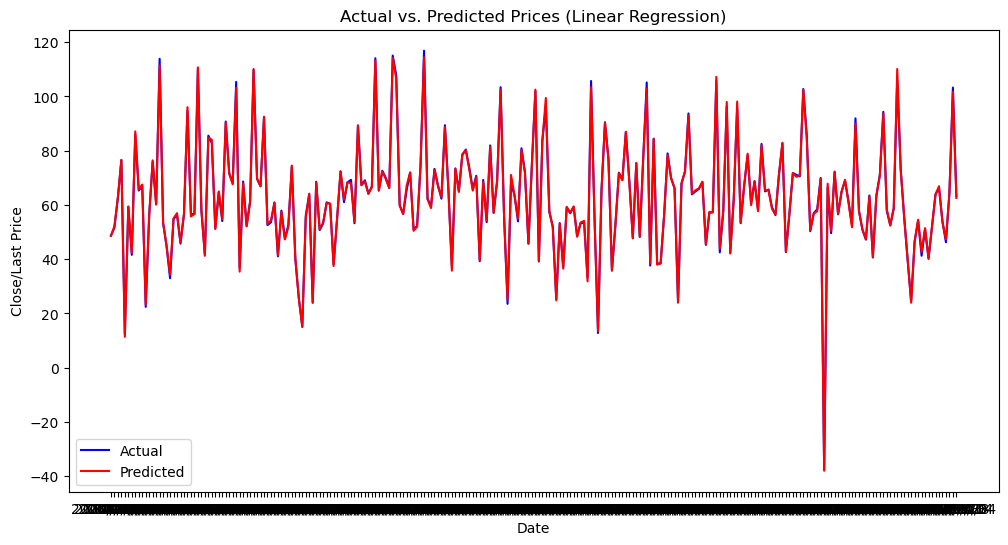

In [11]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.legend()
plt.show()

## RESULTS

In [87]:
import pandas as pd

# Create a list of results
results = [
    {"Model": "ARIMA", "RMSE": 3.17, "MAE": 1.39, "MAPE": 2.68},
    {"Model": "SARIMA", "RMSE": 0.80, "MAE": 0.57, "MAPE": 0.96},
    {"Model": "ARIMAX", 'RMSE': 0.70, 'MAE': 0.49, 'MAPE': 0.81},
    {"Model": "SARIMAX", "RMSE": 0.80, "MAE": 0.57, "MAPE": 0.96},
    {"Model": "Seasonal Naive Forecasting", "RMSE": 6.20, "MAE": 4.30, "MAPE": 8.08},
    {"Model": "Linear Regression", "RMSE": 0.76, "MAE": 0.50, "MAPE": 0.86},
    {"Model": 'LSTM', 'RMSE': 6.87, 'MAE': 5.17, 'MAPE': 5.24},
]

# Create a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by RMSE in ascending order
results_df = results_df.sort_values(by="RMSE")

# Reset the index
results_df.reset_index(drop=True, inplace=True)

# Display the sorted table
print(results_df)

                        Model  RMSE   MAE  MAPE
0                      ARIMAX  0.70  0.49  0.81
1           Linear Regression  0.76  0.50  0.86
2                      SARIMA  0.80  0.57  0.96
3                     SARIMAX  0.80  0.57  0.96
4                       ARIMA  3.17  1.39  2.68
5  Seasonal Naive Forecasting  6.20  4.30  8.08
6                        LSTM  6.87  5.17  5.24


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your time series data into a DataFrame
# Ensure it contains only the columns 'Close', 'Open', 'High', 'Low'

target_columns = ['Close', 'Open', 'High', 'Low']

# Extract the relevant data
X = df1.values  # All columns are features
y = df1[target_columns].values  # Target columns to forecast

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model with multiple output nodes
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))  # Input shape assumes univariate time series
model.add(Dense(len(target_columns)))  # Output layer with the same number of nodes as target columns

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

mse_values = []

# Calculate MSE for each target column separately
for i, column in enumerate(target_columns):
    mse_i = mean_squared_error(y_test[:, i], y_pred[:, i])
    mse_values.append(mse_i)
    print(f"Mean Squared Error for '{column}': {mse_i}")

# Overall MSE (optional)
overall_mse = mean_squared_error(y_test, y_pred)
print(f"Overall Mean Squared Error: {overall_mse}")

Epoch 1/50
31/31 [==============================] - 4s 8ms/step - loss: 4509.7495
Epoch 2/50
31/31 [==============================] - 0s 8ms/step - loss: 4228.8115
Epoch 3/50
31/31 [==============================] - 0s 8ms/step - loss: 3596.9126
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 3286.5083
Epoch 5/50
31/31 [==============================] - 0s 7ms/step - loss: 3063.7107
Epoch 6/50
31/31 [==============================] - 0s 8ms/step - loss: 2871.8230
Epoch 7/50
31/31 [==============================] - 0s 8ms/step - loss: 2699.3853
Epoch 8/50
31/31 [==============================] - 0s 8ms/step - loss: 2540.4062
Epoch 9/50
31/31 [==============================] - 0s 7ms/step - loss: 2393.5051
Epoch 10/50
31/31 [==============================] - 0s 8ms/step - loss: 2256.9268
Epoch 11/50
31/31 [==============================] - 0s 8ms/step - loss: 2128.7227
Epoch 12/50
31/31 [==============================] - 0s 8ms/step - loss: 2009.4460
Epoch 13/50
3

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE (Root Mean Squared Error) for each target column
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
for i, column in enumerate(target_columns):
    print(f"RMSE for '{column}': {rmse[i]}")

# Calculate MAE (Mean Absolute Error) for each target column
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
for i, column in enumerate(target_columns):
    print(f"MAE for '{column}': {mae[i]}")

# Calculate MAPE (Mean Absolute Percentage Error) for each target column
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = [calculate_mape(y_test[:, i], y_pred[:, i]) for i in range(len(target_columns))]
for i, column in enumerate(target_columns):
    print(f"MAPE for '{column}': {mape[i]:.2f}%")

RMSE for 'Close': 20.823970956106052
RMSE for 'Open': 20.865552468761233
RMSE for 'High': 21.165905831581625
RMSE for 'Low': 20.634291303373782
MAE for 'Close': 15.048672429694502
MAE for 'Open': 15.061268160460427
MAE for 'High': 15.208049407708849
MAE for 'Low': 14.931545662176417
MAPE for 'Close': 28.80%
MAPE for 'Open': 28.01%
MAPE for 'High': 27.14%
MAPE for 'Low': 29.75%


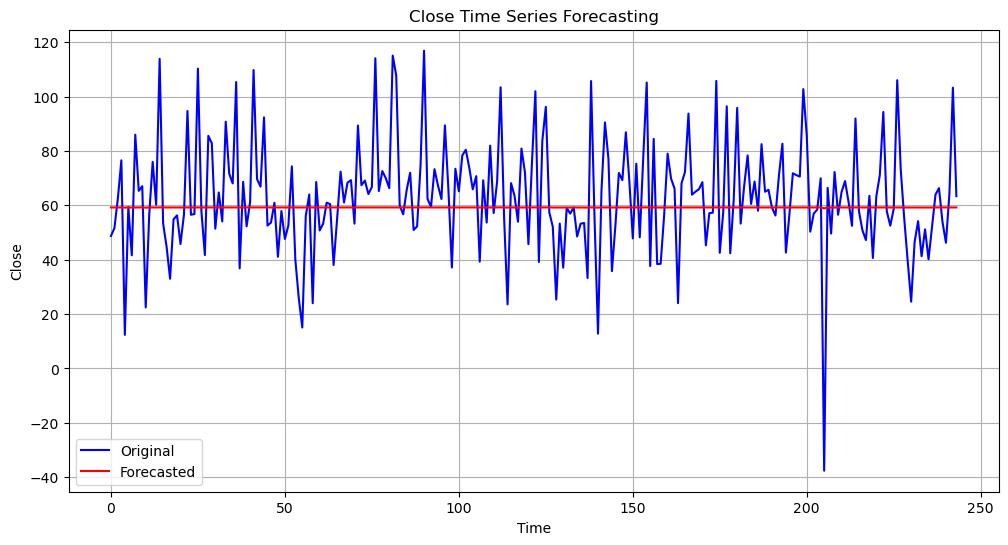

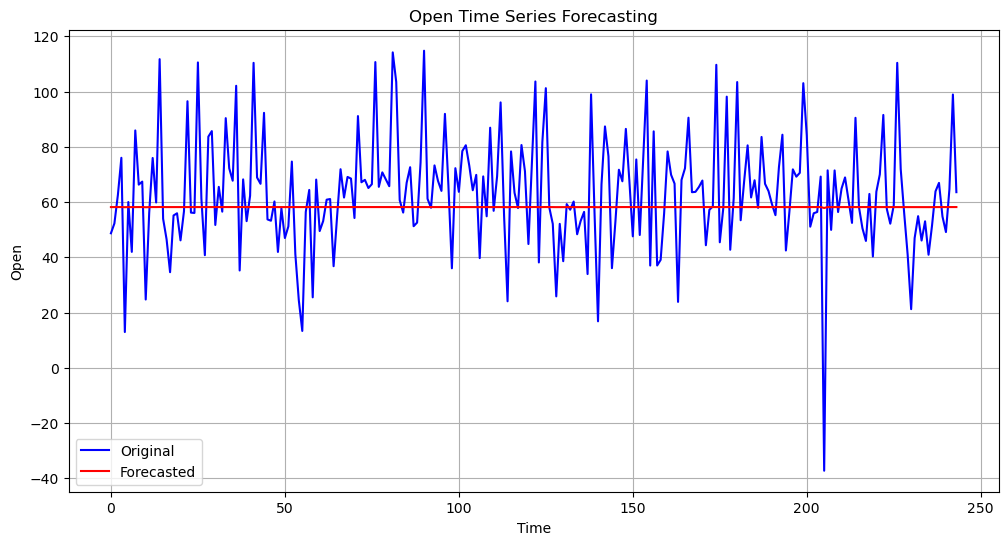

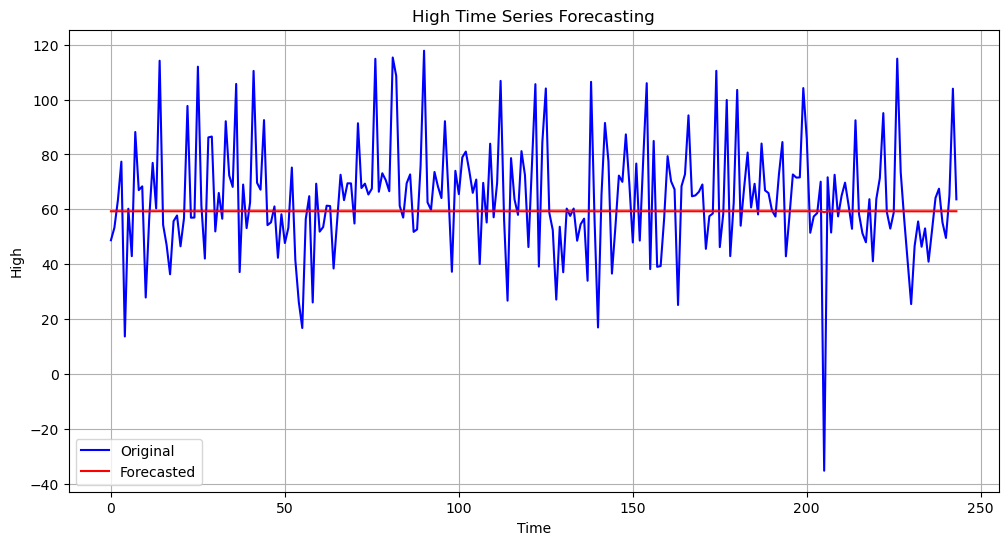

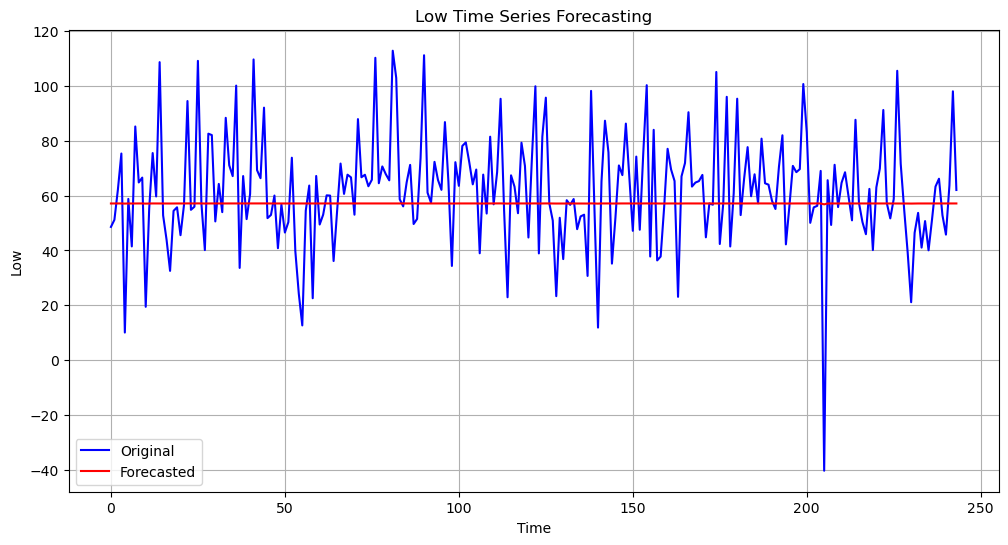

In [15]:
# Define a function to plot the original vs. forecasted values
def plot_time_series(y_true, y_pred, column_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Original', color='blue')
    plt.plot(y_pred, label='Forecasted', color='red')
    plt.xlabel('Time')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Time Series Forecasting')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot time series graphs for each column
for i, column in enumerate(target_columns):
    plot_time_series(y_test[:, i], y_pred[:, i], column)

In [14]:
# Assuming you already have y_test and y_pred calculated as shown in the previous example

# Iterate through each target column and print original vs. forecasted values
for i, column in enumerate(target_columns):
    print(f"Column: {column}")
    
    # Extract the original values
    original_values = y_test[:, i]
    
    # Extract the forecasted values
    forecasted_values = y_pred[:, i]
    
    # Print the original vs. forecasted values
    for j in range(len(original_values)):
        print(f"Time Step {j + 1}: Original={original_values[j]}, Forecasted={forecasted_values[j]}")
    
    # Calculate and print RMSE for this column
    rmse_column = np.sqrt(mean_squared_error(original_values, forecasted_values))
    print(f"RMSE for '{column}': {rmse_column}\n")

Column: Close
Time Step 1: Original=48.73, Forecasted=59.20970153808594
Time Step 2: Original=51.59, Forecasted=59.21076583862305
Time Step 3: Original=62.6, Forecasted=59.216827392578125
Time Step 4: Original=76.56, Forecasted=59.222328186035156
Time Step 5: Original=12.34, Forecasted=59.16828918457031
Time Step 6: Original=59.41, Forecasted=59.215858459472656
Time Step 7: Original=41.61, Forecasted=59.195655822753906
Time Step 8: Original=85.98, Forecasted=59.225440979003906
Time Step 9: Original=65.31, Forecasted=59.219146728515625
Time Step 10: Original=67.04, Forecasted=59.218849182128906
Time Step 11: Original=22.43, Forecasted=59.15994644165039
Time Step 12: Original=56.34, Forecasted=59.20348358154297
Time Step 13: Original=75.98, Forecasted=59.22159194946289
Time Step 14: Original=60.21, Forecasted=59.2110481262207
Time Step 15: Original=113.9, Forecasted=59.241641998291016
Time Step 16: Original=53.33, Forecasted=59.20975112915039
Time Step 17: Original=44.76, Forecasted=59.2

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load your time series data into a DataFrame
# Ensure it contains 'Close', 'Open', 'High', 'Low', and any other relevant features

target_columns = ['Close', 'Open', 'High', 'Low']

# Extract the relevant data
X = df1.drop(target_columns, axis=1)  # Exogenous features
y = df1[target_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the exogenous features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an ARIMA-X model for each target column
arima_models = []
for column in target_columns:
    model = SARIMAX(endog=y_train[column], exog=X_train_scaled, order=(1, 1, 1))
    model_fit = model.fit()
    arima_models.append(model_fit)

# Make predictions for each target column
y_pred = {column: model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test_scaled) for
          column, model_fit in zip(target_columns, arima_models)}

# Evaluate the model, e.g., using Mean Squared Error for each target column
mse = {column: mean_squared_error(y_test[column], y_pred[column]) for column in target_columns}
for column, error in mse.items():
    print(f"Mean Squared Error for '{column}': {error}")

# You can use the trained models to make future forecasts for Close, Open, High, and Low
# Don't forget to adapt the code and preprocessing to your specific dataset and requirements

Mean Squared Error for 'Close': 404.24491693261473
Mean Squared Error for 'Open': 397.59227610807
Mean Squared Error for 'High': 410.23028641908587
Mean Squared Error for 'Low': 390.56562904981274


## ARIMAX for all columns 

In [33]:
import pmdarima as pm
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Splitting the dataset into X (features) and Y (target)
X = df1[['Close', 'High', 'Low', 'Volume']]
Y = df1['Open']

# Function to fit ARIMAX model and calculate RMSE, MAE, and MAPE
def fit_ARIMAX(X, Y):
    # Replace this with appropriate ARIMAX modeling code
    # You need to define the order and seasonal_order
    mod = sm.tsa.ARIMA(Y, exog=X, order=(1, 0, 0))
    arimax_results = mod.fit()
    Y_pred = arimax_results.predict(exog=X)
    
    rmse = sqrt(mean_squared_error(Y, Y_pred))
    mae = mean_absolute_error(Y, Y_pred)
    mape = (np.abs((Y - Y_pred) / Y)).mean() * 100
    
    return arimax_results, rmse, mae, mape

# Create a list of models and their corresponding metrics
models = []

arimax_model, arimax_rmse, arimax_mae, arimax_mape = fit_ARIMAX(X, Y)
models.append(('ARIMAX', arimax_model, arimax_rmse, arimax_mae, arimax_mape))


# Print the model table with RMSE, MAE, and MAPE
for name, model, rmse, mae, mape in models:
    accuracy = 1 - (rmse / Y.std())
    print(f'{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}%, Accuracy={accuracy:.2%}')

ARIMAX: RMSE=0.92, MAE=0.58, MAPE=0.96%, Accuracy=95.39%


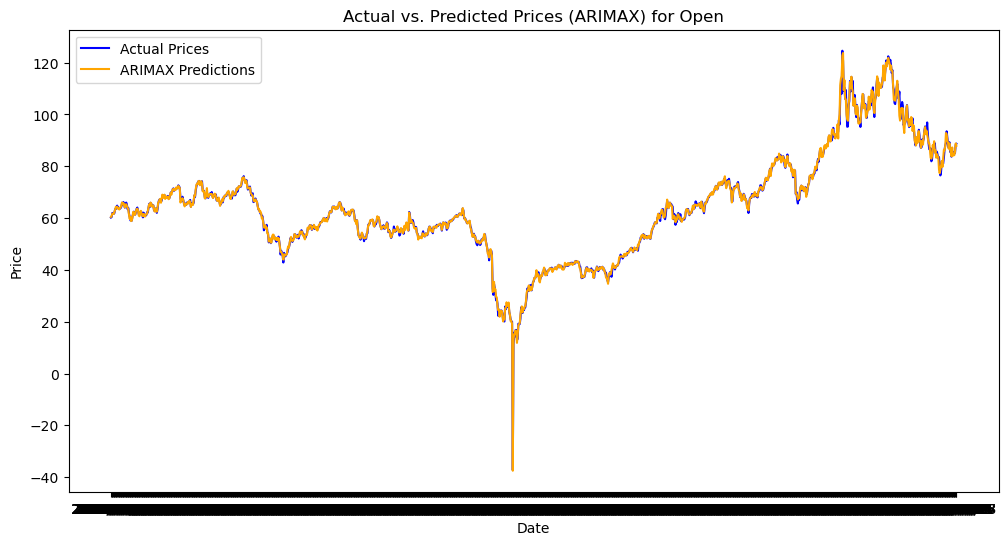

In [34]:
# Plot actual vs. predicted prices for ARIMAX model
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual Prices', color='blue')
plt.plot(Y.index, arimax_model.predict(exog=X), label='ARIMAX Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (ARIMAX) for Open')
plt.legend()
plt.show()

In [35]:
import pmdarima as pm
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Splitting the dataset into X (features) and Y (target)
X = df1[['Close', 'Open', 'Low', 'Volume']]
Y = df1['High']

# Function to fit ARIMAX model and calculate RMSE, MAE, and MAPE
def fit_ARIMAX(X, Y):
    # Replace this with appropriate ARIMAX modeling code
    # You need to define the order and seasonal_order
    mod = sm.tsa.ARIMA(Y, exog=X, order=(1, 0, 0))
    arimax_results = mod.fit()
    Y_pred = arimax_results.predict(exog=X)
    
    rmse = sqrt(mean_squared_error(Y, Y_pred))
    mae = mean_absolute_error(Y, Y_pred)
    mape = (np.abs((Y - Y_pred) / Y)).mean() * 100
    
    return arimax_results, rmse, mae, mape

# Create a list of models and their corresponding metrics
models = []

arimax_model, arimax_rmse, arimax_mae, arimax_mape = fit_ARIMAX(X, Y)
models.append(('ARIMAX', arimax_model, arimax_rmse, arimax_mae, arimax_mape))


# Print the model table with RMSE, MAE, and MAPE
for name, model, rmse, mae, mape in models:
    accuracy = 1 - (rmse / Y.std())
    print(f'{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}%, Accuracy={accuracy:.2%}')

ARIMAX: RMSE=0.76, MAE=0.49, MAPE=0.81%, Accuracy=96.26%


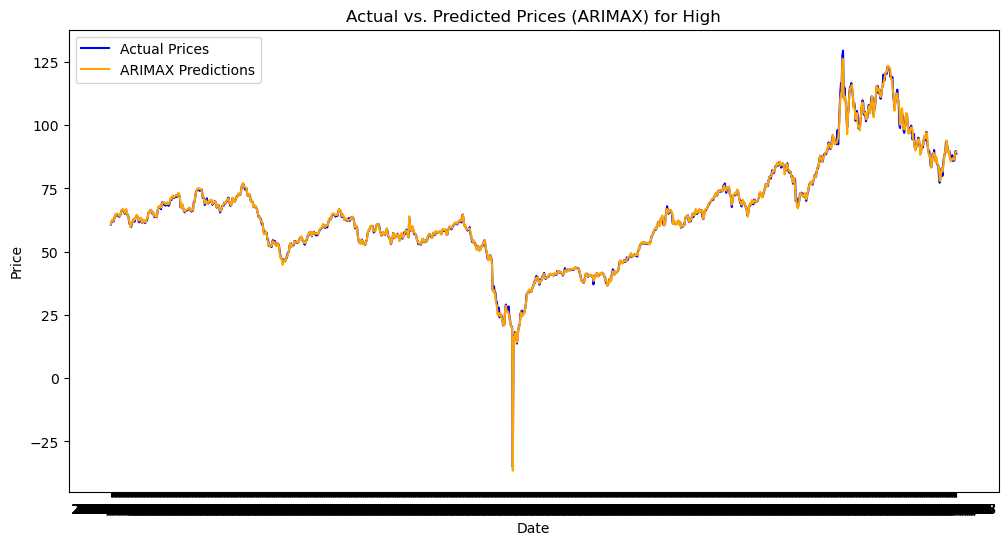

In [36]:
# Plot actual vs. predicted prices for ARIMAX model
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual Prices', color='blue')
plt.plot(Y.index, arimax_model.predict(exog=X), label='ARIMAX Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (ARIMAX) for High')
plt.legend()
plt.show()

In [37]:
import pmdarima as pm
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Splitting the dataset into X (features) and Y (target)
X = df1[['Close', 'High', 'Open', 'Volume']]
Y = df1['Low']

# Function to fit ARIMAX model and calculate RMSE, MAE, and MAPE
def fit_ARIMAX(X, Y):
    # Replace this with appropriate ARIMAX modeling code
    # You need to define the order and seasonal_order
    mod = sm.tsa.ARIMA(Y, exog=X, order=(1, 0, 0))
    arimax_results = mod.fit()
    Y_pred = arimax_results.predict(exog=X)
    
    rmse = sqrt(mean_squared_error(Y, Y_pred))
    mae = mean_absolute_error(Y, Y_pred)
    mape = (np.abs((Y - Y_pred) / Y)).mean() * 100
    
    return arimax_results, rmse, mae, mape

# Create a list of models and their corresponding metrics
models = []

arimax_model, arimax_rmse, arimax_mae, arimax_mape = fit_ARIMAX(X, Y)
models.append(('ARIMAX', arimax_model, arimax_rmse, arimax_mae, arimax_mape))


# Print the model table with RMSE, MAE, and MAPE
for name, model, rmse, mae, mape in models:
    accuracy = 1 - (rmse / Y.std())
    print(f'{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, MAPE={mape:.2f}%, Accuracy={accuracy:.2%}')

ARIMAX: RMSE=0.76, MAE=0.52, MAPE=0.91%, Accuracy=96.15%


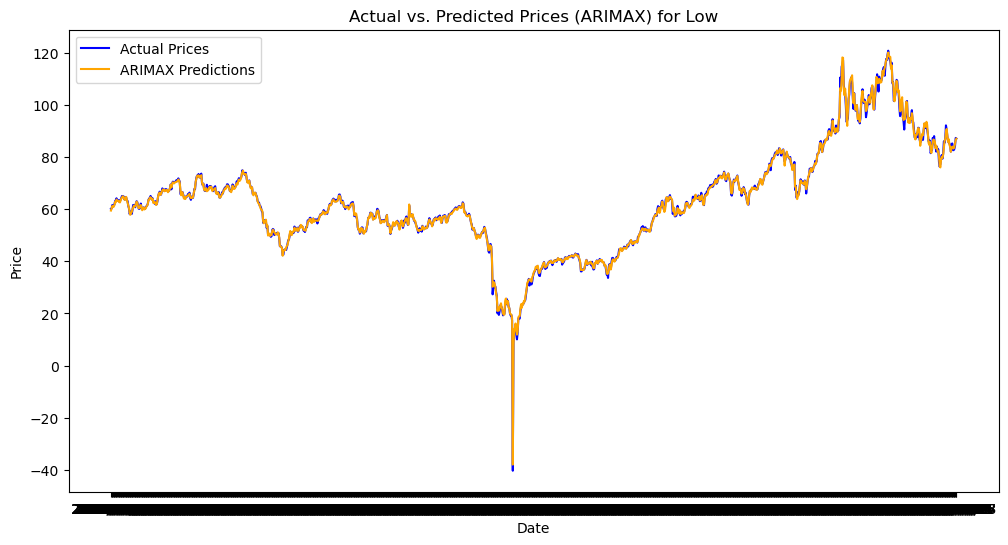

In [38]:
# Plot actual vs. predicted prices for ARIMAX model
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Actual Prices', color='blue')
plt.plot(Y.index, arimax_model.predict(exog=X), label='ARIMAX Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (ARIMAX) for Low')
plt.legend()
plt.show()

In [43]:
from tabulate import tabulate

# Data
data = [
    ["Column", "RMSE", "MAE", "MAPE", "Accuracy"],
    ["Close", "0.70", "0.49", "0.81%", "96.49%"],
    ["Open", "0.92", "0.58", "0.96%", "95.39%"],
    ["High", "0.76", "0.49", "0.81%", "96.26%"],
    ["Low", "0.76", "0.52", "0.91%", "96.15%"]
]

# Print the table with a header and formatting
table = tabulate(data, headers="firstrow", tablefmt="fancy_grid")
header = "Using ARIMAX Model"
separator = "=" * len(header)

# Print the table with header and separator
print(header)
print(separator)
print(table)

Using ARIMAX Model
╒══════════╤════════╤═══════╤════════╤════════════╕
│ Column   │   RMSE │   MAE │ MAPE   │ Accuracy   │
╞══════════╪════════╪═══════╪════════╪════════════╡
│ Close    │   0.7  │  0.49 │ 0.81%  │ 96.49%     │
├──────────┼────────┼───────┼────────┼────────────┤
│ Open     │   0.92 │  0.58 │ 0.96%  │ 95.39%     │
├──────────┼────────┼───────┼────────┼────────────┤
│ High     │   0.76 │  0.49 │ 0.81%  │ 96.26%     │
├──────────┼────────┼───────┼────────┼────────────┤
│ Low      │   0.76 │  0.52 │ 0.91%  │ 96.15%     │
╘══════════╧════════╧═══════╧════════╧════════════╛


# Final LSTM

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [248]:
# Load your data
# df = pd.read_csv('your_data.csv')  # You can load your data from a CSV file

# Select features and target
features = df1[['Volume', 'Open', 'High', 'Low']]
target = df1['close']

# Split data into training and testing sets
train_size = int(len(df1) * 0.8)
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]


In [249]:
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [250]:
def create_sequences(features, target, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i : i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_features, train_target, sequence_length)
X_test, y_test = create_sequences(test_features, test_target, sequence_length)


In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking

model1 = Sequential()
model1.add(Masking(mask_value=0.0, input_shape=(None, 4)))  # Masking layer for variable sequence length
model1.add(LSTM(64, return_sequences=True))  # LSTM layer with return_sequences=True
model.add(Dense(1))  # Output layer for forecasting the target

model1.compile(loss='mean_squared_error', optimizer='adam')


In [100]:
y_pred = model1.predict(X_test)


8/8 [==============================] - 0s 5ms/step


In [101]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')


MAPE: 0.060739458097614434


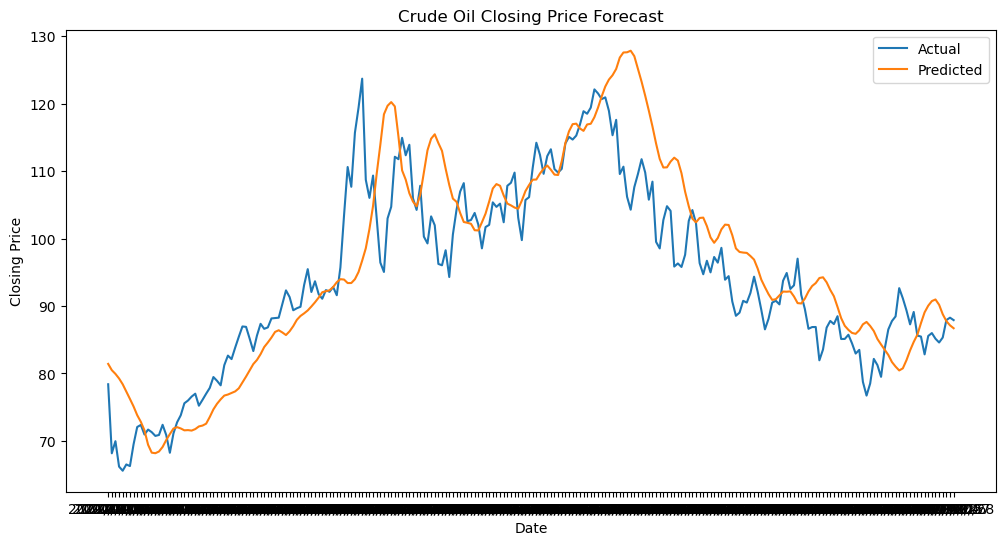

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(test_target.index[sequence_length:], test_target.values[sequence_length:], label='Actual')
plt.plot(test_target.index[sequence_length:], y_pred, label='Predicted')
plt.legend()
plt.title('Crude Oil Closing Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


# Forecasting upcoming 40 days Closing Price Using LSTM

In [167]:
model1.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 50)                11000     
                                                                 
 dense_36 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11051 (43.17 KB)
Trainable params: 11051 (43.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
future_df = pd.read_csv("Forecasting of 40 days.csv")

In [172]:
future_df.head()


Date  Volume   Open   High    Low
0  29-10-2022  369652  96.90  93.51  90.54
1  31-10-2022  327567  92.31  91.15  88.71
2  01-11-2022  287536  88.83  89.63  85.98
3  02-11-2022  256223  86.56  89.66  86.35
4  03-11-2022  392625  86.50  87.30  86.27

In [189]:
sequence_length = 10

In [190]:
# Select features for the upcoming days
future_features = future_df[['Volume', 'Open', 'High', 'Low']]

# Scale the features
future_features = scaler.transform(future_features)

# Create sequences for the upcoming data
X_future, _ = create_sequences(future_features, np.zeros(len(future_features)), sequence_length)


In [191]:
future_features

array([[0.216702  , 1.10284446, 1.06715861, 1.05779646],
       [0.19180389, 1.06511016, 1.04759141, 1.0430038 ],
       [0.16812095, 1.03650115, 1.03498881, 1.02093606],
       [0.14959572, 1.01783953, 1.03523754, 1.02392693],
       [0.23029316, 1.01734627, 1.01567034, 1.02328025],
       [0.21381137, 1.02088129, 0.98756322, 0.98472233],
       [0.17985682, 0.97961197, 0.98316889, 0.99248242],
       [0.15491907, 0.98692864, 1.01484122, 0.99450327],
       [0.14352694, 1.01529102, 1.02769256, 1.03209118],
       [0.1847968 , 1.09454127, 1.10405439, 1.08309757],
       [0.20466618, 1.10013154, 1.09609485, 1.05795813],
       [0.12546848, 1.09865176, 1.11292596, 1.09037265],
       [0.03727942, 1.10588622, 1.14418373, 1.10071942],
       [0.01818091, 1.14477146, 1.1579471 , 1.14380406],
       [0.00881092, 1.15792502, 1.15736672, 1.14647159],
       [0.17900016, 1.12758961, 1.1208855 , 1.09053431],
       [0.17135117, 1.09963828, 1.10156703, 1.08980681],
       [0.15238814, 1.0880467 ,

In [192]:
future_predictions = model1.predict(X_future)


2/2 [==============================] - 0s 4ms/step


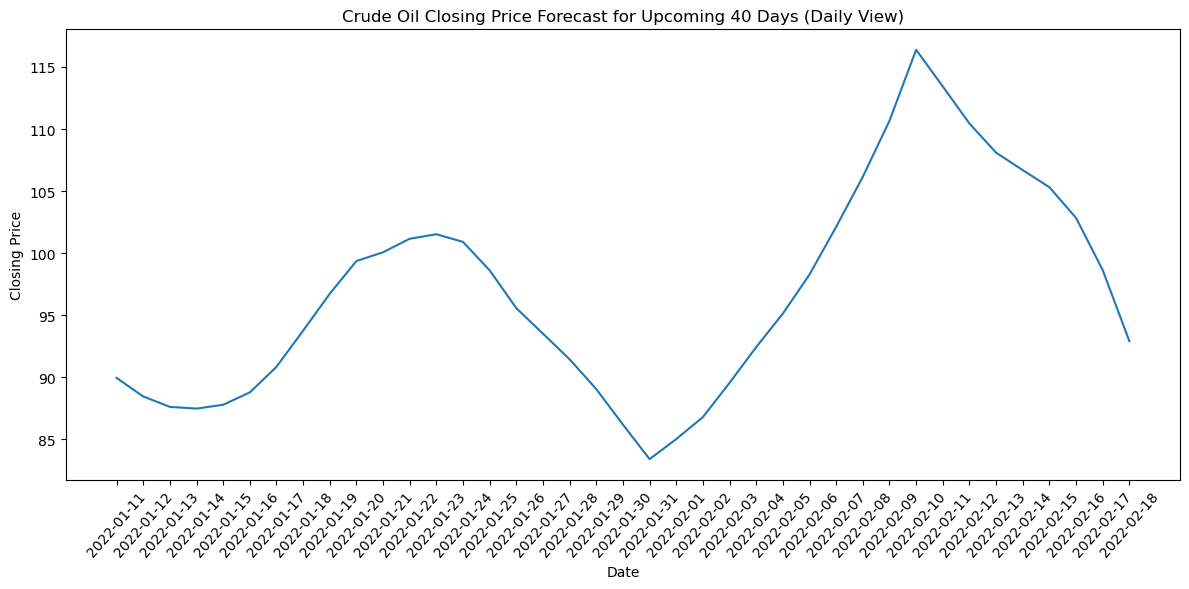

In [195]:
# Create date range for the upcoming days
date_range = pd.date_range(start=future_df['Date'].min(), periods=len(future_predictions), freq='D')

plt.figure(figsize=(12, 6))
plt.plot(date_range, future_predictions, label='Predicted')
plt.title('Crude Oil Closing Price Forecast for Upcoming 40 Days (Daily View)')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Set the x-axis to display daily dates
plt.xticks(date_range, rotation=49)

plt.tight_layout()
plt.show()


In [194]:
future_predictions

array([[ 89.952286],
       [ 88.45881 ],
       [ 87.61835 ],
       [ 87.47917 ],
       [ 87.787   ],
       [ 88.78415 ],
       [ 90.84223 ],
       [ 93.75693 ],
       [ 96.73258 ],
       [ 99.36646 ],
       [100.073814],
       [101.161934],
       [101.52571 ],
       [100.90527 ],
       [ 98.6125  ],
       [ 95.56659 ],
       [ 93.51431 ],
       [ 91.4482  ],
       [ 89.048744],
       [ 86.18882 ],
       [ 83.40814 ],
       [ 85.024895],
       [ 86.796776],
       [ 89.552574],
       [ 92.434265],
       [ 95.13289 ],
       [ 98.28264 ],
       [102.12229 ],
       [106.15556 ],
       [110.66285 ],
       [116.38157 ],
       [113.429535],
       [110.442696],
       [108.09366 ],
       [106.692085],
       [105.31043 ],
       [102.840675],
       [ 98.63249 ],
       [ 92.9142  ]], dtype=float32)

# Saving the model

Epoch 1/50
31/31 [==============================] - 2s 4ms/step - loss: 0.1341
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 9/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 10/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 11/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 12/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 13/50
31/31 [==============================

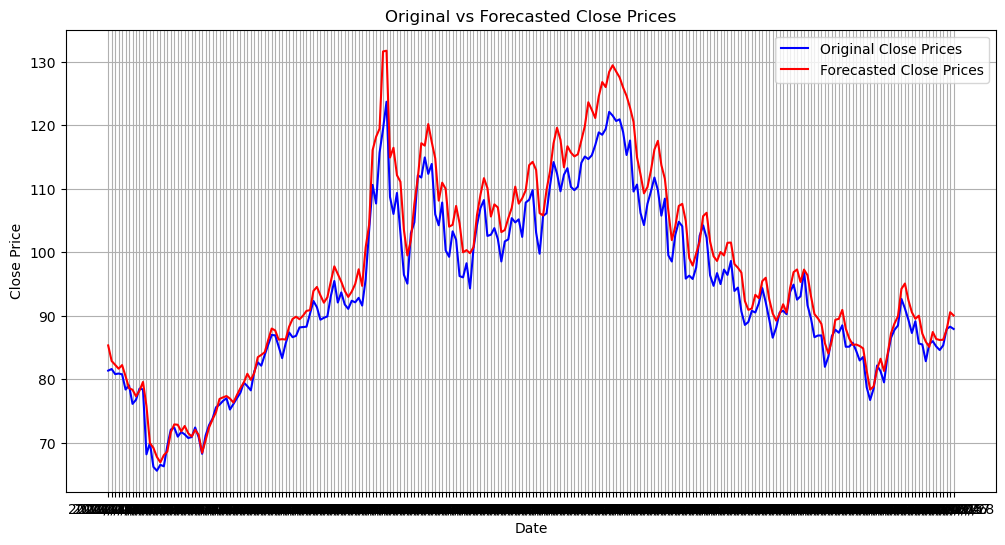

In [80]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your time series data into a Pandas DataFrame (assuming it's already loaded)

# Define your features and target variable
features = ['Volume', 'Open', 'High', 'Low']
target = 'close'

# Extract the feature and target data
X = df1[features].values
y = df1[target].values

# Create separate scalers for features and close prices
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

X = scaler_features.fit_transform(X)
y = scaler_target.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Ensure the data is in the correct shape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create an LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(X_train.shape[1], 1)))  # Corrected input shape
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform to get actual close prices
predicted_prices = scaler_target.inverse_transform(predicted_prices)
y_test = scaler_target.inverse_transform(y_test)

# Inverse transform the original and forecasted prices
original_prices = y_test
forecasted_prices = predicted_prices

# Create a time index for the data (assuming it's a daily time series)
time_index = df1.index[-len(original_prices):]

# Plot original vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, original_prices, label='Original Close Prices', color='blue')
plt.plot(time_index, forecasted_prices, label='Forecasted Close Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original vs Forecasted Close Prices')
plt.legend()
plt.grid(True)

plt.show()


In [81]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_prices)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predicted_prices)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 3.081789373178951
Root Mean Squared Error (RMSE): 4.000435459893449
Mean Absolute Percentage Error (MAPE): 3.118120373132458%


In [82]:
import joblib

# Save the trained LSTM model
model.save("lstm_model.h5")

# Save the feature scaler and target scaler
joblib.dump(scaler_features, "feature_scaler.pkl")
joblib.dump(scaler_target, "target_scaler.pkl")

['target_scaler.pkl']

In [192]:
df2 = df1['close']

In [193]:
df2 = pd.DataFrame(df2)

In [197]:
df2.index = pd.to_datetime(df2.index)

In [198]:
df2

close
Date             
2018-01-02  60.37
2018-01-03  61.63
2018-01-04  62.01
2018-01-05  61.44
2018-01-06  61.44
...           ...
2022-10-24  84.58
2022-10-25  85.32
2022-10-26  87.91
2022-10-27  88.26
2022-10-28  87.90

[1761 rows x 1 columns]

Epoch 1/100
30/30 [==============================] - 2s 13ms/step - loss: 0.2521
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 3/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 7.6487e-04
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 7.1381e-04
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 6.8505e-04
Epoch 7/100
30/30 [==============================] - 0s 11ms/step - loss: 6.5314e-04
Epoch 8/100
30/30 [==============================] - 0s 11ms/step - loss: 6.5389e-04
Epoch 9/100
30/30 [==============================] - 0s 13ms/step - loss: 5.9627e-04
Epoch 10/100
30/30 [==============================] - 0s 12ms/step - loss: 5.6386e-04
Epoch 11/100
30/30 [==============================] - 0s 12ms/step - loss: 5.3339e-04
Epoch 12/100
30/30 [==============================] - 0s 12ms/step - loss: 

30/30 [==============================] - 0s 12ms/step - loss: 2.8510e-04
Epoch 97/100
30/30 [==============================] - 0s 13ms/step - loss: 3.1760e-04
Epoch 98/100
30/30 [==============================] - 0s 13ms/step - loss: 3.2096e-04
Epoch 99/100
30/30 [==============================] - 0s 13ms/step - loss: 2.8324e-04
Epoch 100/100
8/8 [==============================] - 0s 6ms/step
RMSE: 4.286973264577513
MAE: 3.2338410866360703
MAPE: 16.774378895424565%


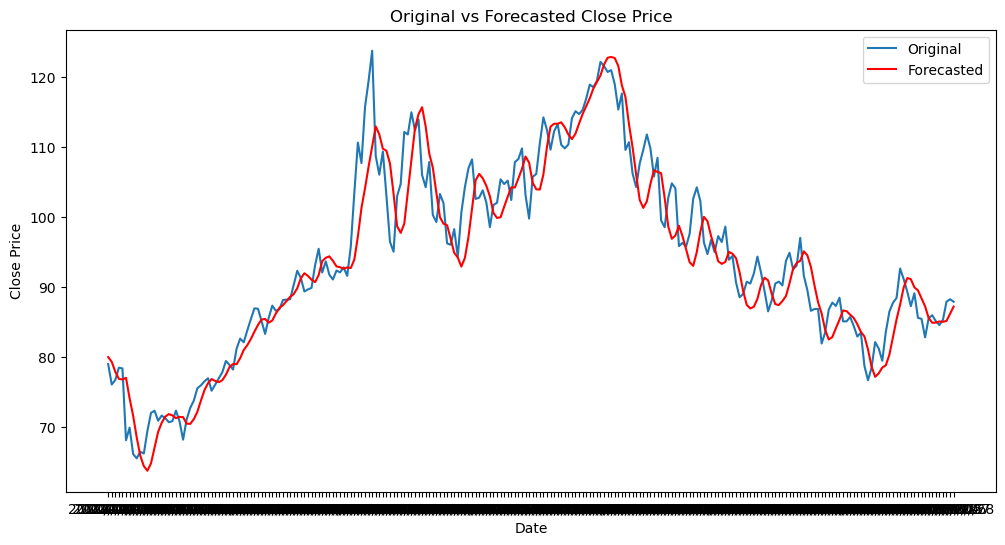

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataframe df2 with date as index and 'close' as the column
# Make sure the 'close' column is a numeric type
# df2 = ...

# Convert the 'close' column to a NumPy array
data = df2['close'].values

# Normalize the data (scaling it between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Define a function to prepare the data for LSTM
def prepare_data(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set sequence length and split the data into train and test sets
sequence_length = 30  # You can adjust this value
X, y = prepare_data(data_scaled, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(df2['close'].values[-len(y_test):], y_pred_inv))
mae = mean_absolute_error(df2['close'].values[-len(y_test):], y_pred_inv)

# Calculate MAPE
mape = np.mean(np.abs((df2['close'].values[-len(y_test):] - y_pred_inv) / df2['close'].values[-len(y_test):])) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

# Create a plot to visualize the original vs forecasted close prices
plt.figure(figsize=(12, 6))
plt.plot(df2.index[-len(y_test):], df2['close'].values[-len(y_test):], label='Original')
plt.plot(df2.index[-len(y_test):], y_pred_inv, label='Forecasted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Original vs Forecasted Close Price')
plt.show()


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your dataframe df2 with date as index and 'close' as the column
# Make sure the 'close' column is a numeric type
# df2 = ...

# Convert the 'close' column to a NumPy array
data = df2['close'].values

# Normalize the data (scaling it between 0 and 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Define a function to prepare the data for LSTM
def prepare_data(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 30  # You can adjust this value

# Prepare data and scale it
X, y = prepare_data(data_scaled, sequence_length)

# Build and train the LSTM model (as shown in the previous code)

# Generate predictions for the next 40 weekdays
forecast_days = 40

# Start with the most recent available data
last_sequence = data_scaled[-sequence_length:]
forecasted_values = []

for _ in range(forecast_days):
    # Reshape the last_sequence for model prediction
    input_data = last_sequence.reshape(1, sequence_length, 1)
    
    # Make a prediction for the next day
    next_day_prediction = model.predict(input_data)
    
    # Inverse transform the prediction to get the actual price
    next_day_close = scaler.inverse_transform(next_day_prediction)[0, 0]
    
    # Append the next day's close price to the forecasted_values list
    forecasted_values.append(next_day_close)
    
    # Update the last_sequence by removing the oldest data and appending the new prediction
    last_sequence = np.append(last_sequence[1:], next_day_prediction)

# Create a date range for the forecasted days
last_date = df2.index[-1]
forecasted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='B')

# Create a plot for the original and forecasted close prices
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['close'], label='Original')
plt.plot(forecasted_dates, forecasted_values, label='Forecasted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Original vs Forecasted Close Price')
plt.show()


1/1 [==============================] - 0s 29ms/step


TypeError: can only concatenate str (not "Timedelta") to str

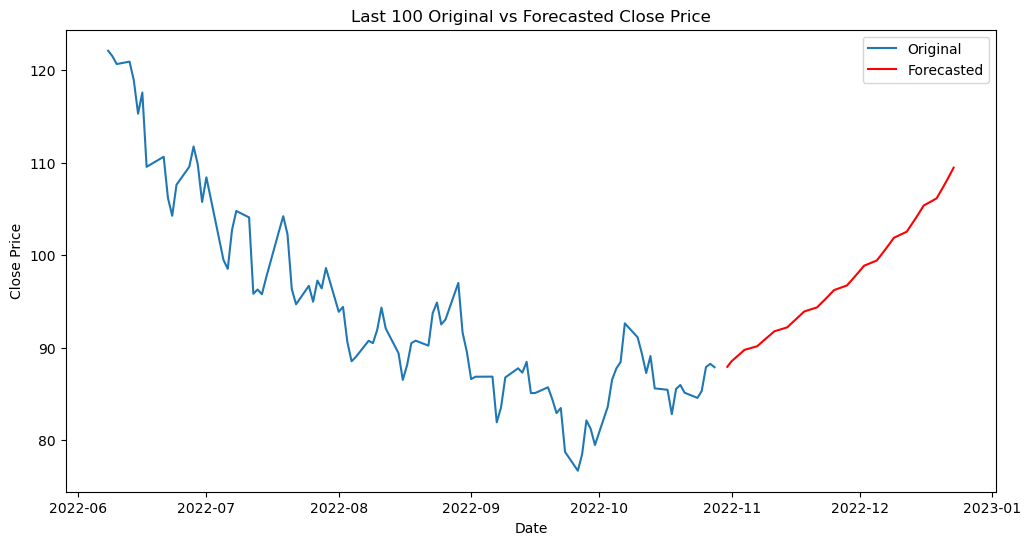

In [31]:
# Create a plot for the last 100 original close prices and the last 100 forecasted close prices
plt.figure(figsize=(12, 6))
plt.plot(df2.index[-100:], df2['close'].values[-100:], label='Original')
plt.plot(forecasted_dates[-100:], forecasted_values[-100:], label='Forecasted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Last 100 Original vs Forecasted Close Price')
plt.show()


In [34]:
import joblib

# Save the trained model to a file
model.save('close_lstm_model.h5')

# Save the scaler to a file using joblib
joblib.dump(scaler, 'close_scaler.pkl')

['close_scaler.pkl']

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you already have your DataFrame df2 with 'close' column and date as the index

# Step 1: Data Preprocessing
data = df2['close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create the dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  # Adjust this as needed
X, Y = create_dataset(data, look_back)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Step 2: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 3: Train the LSTM Model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Step 4: Evaluate the Model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE and MAE for training and testing data
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
train_mae = mean_absolute_error(y_train[0], train_predict[:, 0])
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
test_mae = mean_absolute_error(y_test[0], test_predict[:, 0])

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Training MAE: {train_mae:.2f}')
print(f'Testing RMSE: {test_rmse:.2f}')
print(f'Testing MAE: {test_mae:.2f}')

Epoch 1/50
1400/1400 - 12s - loss: 0.0021 - 12s/epoch - 9ms/step
Epoch 2/50
1400/1400 - 8s - loss: 3.8343e-04 - 8s/epoch - 6ms/step
Epoch 3/50
1400/1400 - 8s - loss: 3.2641e-04 - 8s/epoch - 6ms/step
Epoch 4/50
1400/1400 - 8s - loss: 3.0104e-04 - 8s/epoch - 6ms/step
Epoch 5/50
1400/1400 - 8s - loss: 3.0501e-04 - 8s/epoch - 6ms/step
Epoch 6/50
1400/1400 - 8s - loss: 2.8945e-04 - 8s/epoch - 6ms/step
Epoch 7/50
1400/1400 - 8s - loss: 2.5535e-04 - 8s/epoch - 6ms/step
Epoch 8/50
1400/1400 - 8s - loss: 2.4530e-04 - 8s/epoch - 6ms/step
Epoch 9/50
1400/1400 - 8s - loss: 2.3719e-04 - 8s/epoch - 6ms/step
Epoch 10/50
1400/1400 - 8s - loss: 2.2250e-04 - 8s/epoch - 6ms/step
Epoch 11/50
1400/1400 - 8s - loss: 2.2964e-04 - 8s/epoch - 6ms/step
Epoch 12/50
1400/1400 - 8s - loss: 2.2552e-04 - 8s/epoch - 6ms/step
Epoch 13/50
1400/1400 - 8s - loss: 2.2006e-04 - 8s/epoch - 6ms/step
Epoch 14/50
1400/1400 - 8s - loss: 2.1825e-04 - 8s/epoch - 6ms/step
Epoch 15/50
1400/1400 - 8s - loss: 2.1819e-04 - 8s/epoch - 

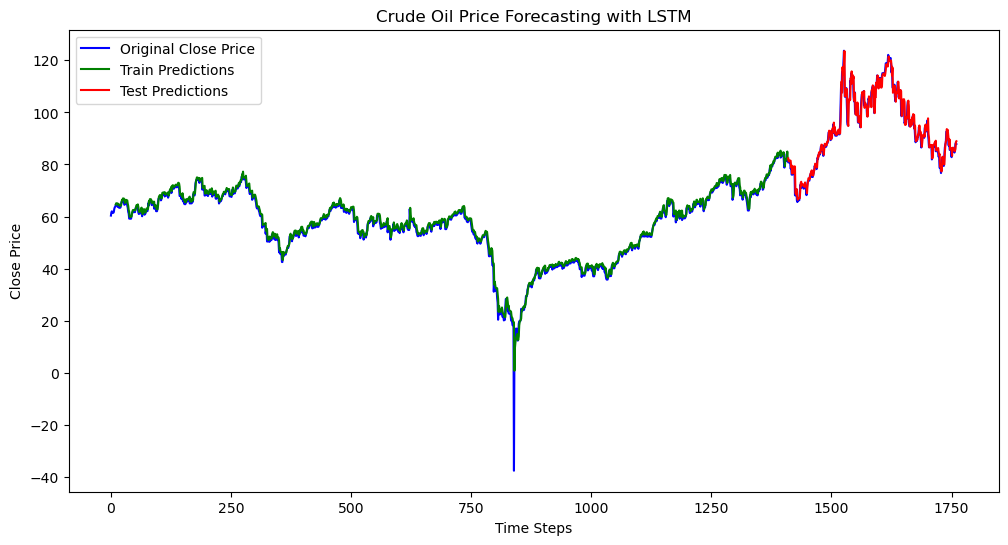

In [150]:
# Step 5: Plot the Original vs Forecasted Close Prices
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, 0] = train_predict[:, 0]

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(data) - len(test_predict):, 0] = test_predict[:, 0]

# Inverse transform the original data to the original scale
data = scaler.inverse_transform(data)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Close Price', color='blue')
plt.plot(train_predict_plot, label='Train Predictions', color='green')
plt.plot(test_predict_plot, label='Test Predictions', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.title('Crude Oil Price Forecasting with LSTM')
plt.legend()
plt.show()


In [151]:
# Calculate MAPE for testing data
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test_mape = mean_absolute_percentage_error(y_test[0], test_predict[:, 0])
print(f'Testing MAPE: {test_mape:.2f}%')

Testing MAPE: 1.83%


In [152]:
import joblib
from tensorflow.keras.models import load_model

# Save the trained scaler to a file
scaler_filename = 'scalerz.pkl'
joblib.dump(scaler, scaler_filename)

# Save the trained model to a file
model_filename = 'crude_oil_lstm_model.h5'
model.save(model_filename)

In [171]:
import joblib
from tensorflow.keras.models import load_model

# Load the trained scaler
scaler_filename = 'scalerz.pkl'
loaded_scaler = joblib.load(scaler_filename)

# Load the trained model
model_filename = 'crude_oil_lstm_model.h5'
loaded_model = load_model(model_filename)


In [175]:
# Assuming df2 is your original DataFrame with date as the index
last_10_days = df2['close'].values[-look_back:]  # Use the last 10 days' data as the initial sequence
next_40_days_predictions = []

for _ in range(40):
    # Reshape and scale the input data
    input_data = scaler.transform(last_10_days.reshape(-1, 1))

    # Predict the next day's price
    prediction = model.predict(input_data.reshape(1, look_back, 1))

    # Inverse transform the prediction to the original scale
    prediction = scaler.inverse_transform(prediction)
    next_40_days_predictions.append(prediction[0, 0])

    # Update the last_10_days with the newly predicted value
    last_10_days = np.roll(last_10_days, shift=-1)
    last_10_days[-1] = prediction[0, 0]


1/1 [==============================] - 0s 20ms/step


In [178]:
import datetime

# Assuming df2 is your original DataFrame with date as the index
last_date = df2.index[-1]
date_range = pd.date_range(last_date, periods=41, closed='right').date


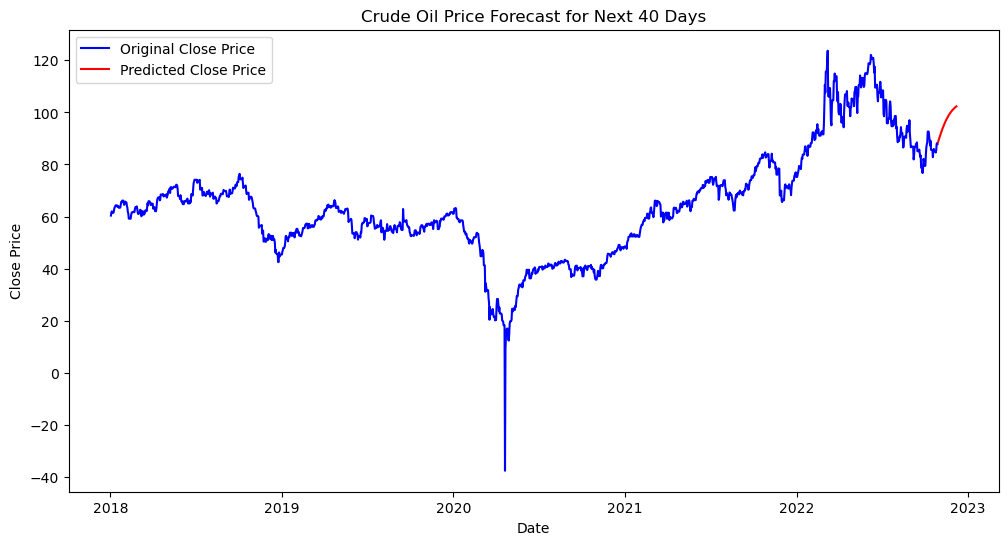

In [181]:
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['close'], label='Original Close Price', color='blue')
plt.plot(date_range, next_40_days_predictions, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Crude Oil Price Forecast for Next 40 Days')
plt.legend()
plt.show()


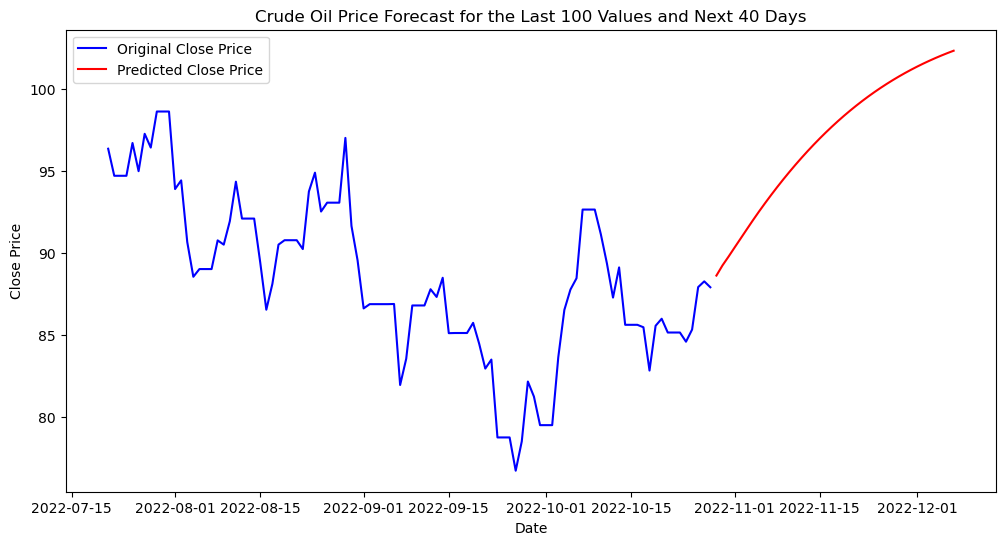

In [185]:
# Assuming df2 is your original DataFrame with date as the index
last_100_original = df2['close'][-100:]
last_100_dates = df2.index[-100:]
next_40_dates = date_range[:40]  # Use the first 40 dates to match the predictions

plt.figure(figsize=(12, 6))
plt.plot(last_100_dates, last_100_original, label='Original Close Price', color='blue')
plt.plot(next_40_dates, next_40_days_predictions, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Crude Oil Price Forecast for the Last 100 Values and Next 40 Days')
plt.legend()
plt.show()


In [186]:
next_40_days_predictions

[88.61269,
 89.23439,
 89.77227,
 90.33033,
 90.882996,
 91.437,
 91.9855,
 92.51801,
 93.031105,
 93.52985,
 94.01378,
 94.482,
 94.93505,
 95.3732,
 95.796684,
 96.205734,
 96.60051,
 96.98111,
 97.34783,
 97.70085,
 98.040375,
 98.36671,
 98.68003,
 98.98068,
 99.26895,
 99.54514,
 99.80957,
 100.062546,
 100.304405,
 100.5355,
 100.75615,
 100.96672,
 101.16752,
 101.35892,
 101.54122,
 101.71477,
 101.87991,
 102.037,
 102.1863,
 102.32814]